# Exploratory Data Analysis

In [1]:
!pip install geopandas

In [2]:
!pip install geopy

In [3]:
!pip install pygeos

In [4]:
!pip install geojson

In [5]:
!sudo apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [6]:
!sudo pip3 install rtree

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
import rtree
import pygeos
import fiona

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.



In [8]:
from shapely.geometry import MultiPolygon
from shapely.geometry import shape

In [9]:
!pwd

/content


In [10]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support
fiona.drvsupport.supported_drivers['KML'] = 'rw'
from zipfile import ZipFile

## OpenStreetMaps

In [11]:
!pip install overpy

In [12]:
import overpy
api = overpy.Overpass()

In [13]:
r = api.query("""
[out:json];

area[name="Chicago"]->.a;

( node(area.a)[amenity=hospital];
);

out;
""")



## Boundaries - Census Blocks 2010

In [14]:
url = 'https://data.cityofchicago.org/resource/bt9m-d2mf.json'
blocks = pd.read_json(url)

In [15]:
blocks['the_geom'].head()

0    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
1    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
2    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
3    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
4    {'type': 'MultiPolygon', 'coordinates': [[[[-8...
Name: the_geom, dtype: object

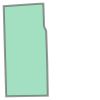

In [16]:
shape(blocks['the_geom'][1])

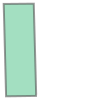

In [17]:
shape(blocks['the_geom'][45])

In [18]:
new_geom = []
for index, row in blocks.iterrows():
  new_geom.append(shape(row['the_geom']))
new_geom = pd.DataFrame(new_geom)
new_geom
blocks['the_geom'] = new_geom

In [19]:
blocks_geo = gpd.GeoDataFrame(blocks).set_geometry('the_geom')

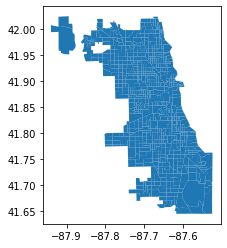

In [20]:
chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Parks

In [21]:
url = 'https://data.cityofchicago.org/resource/2eaw-bdhe.json'
parks = pd.read_json(url)

In [22]:
parks.head()

,park_name,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,park_class,alfred_caldwell_lily_pond,location,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,cricket_field,model_train_display,boat_launch_non_motorized,rowing_club,pool_outdoor,:@computed_region_rpca_8um6,basketball_backboards,shuffleboard,...,pavillion,conservatory,handball_raquetball_court,horseshoe_courts,boat_launch_motorized,ice_skating,ward,model_yacht_basin,zip,tennis_courts,beach,street_address,golf_course,chess_pavillion,spray_feature,golf_course_miniature,basketball_courts,handball,zoo,football_soccer_combo,water_slide,senior_center,:@computed_region_bdys_3d7i,mountain_bike_trail,:@computed_region_6mkv_f3dw,park_number,dog_friendly,playground_park,artificial_turf_fields,boxing_center,playground,label,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
0,MCKEON (JOSEPH),0,0,48.0,0,0,0,0,MINI-PARK,0,"{'latitude': '41.82903552510654', 'human_addre...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.40,0,0,0,0,0,0,37.0,0,0,...,0,0,0,0,0,0,11,0,60609.0,0,0,600 W 36TH ST,0,0,0,0,0,0,0,0,0,0,172.0,0,14924.0,1162,0,1,0,0,0,McKeon,0,0,0,0,0,58.0,0,0
1,OHIO,0,0,23.0,0,0,0,0,MINI-PARK,0,"{'latitude': '41.89145773962588', 'human_addre...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.42,0,0,0,0,0,0,32.0,2,0,...,0,0,0,0,0,0,37,0,60644.0,0,0,4712 W OHIO ST,0,0,1,0,1,0,0,0,0,0,695.0,0,22216.0,1139,0,0,0,0,1,Ohio,0,0,0,0,0,26.0,0,0
2,ALTGELD (JOHN),0,0,23.0,0,0,0,0,COMMUNITY PARK,0,"{'latitude': '41.87472755936259', 'human_addre...",0,0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,4.32,0,0,0,0,0,1,28.0,2,0,...,0,0,0,0,0,0,27,0,60612.0,0,0,515 S WASHTENAW AVE,0,0,0,0,1,0,0,1,0,0,38.0,0,21184.0,206,0,0,0,0,1,Altgeld,0,0,0,0,0,28.0,0,0
3,PARK NO. 468,0,0,15.0,0,0,0,0,UNIMPROVED PARK,0,"{'latitude': '41.791344140064204', 'human_addr...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.32,0,0,0,0,0,0,58.0,0,0,...,0,0,0,0,0,0,13,0,60629.0,0,0,4556 W 56TH ST,0,0,0,0,0,0,0,0,0,0,773.0,0,21867.0,468,0,0,0,0,0,Park No. 468,0,0,0,0,0,60.0,0,0
4,RAINEY (EDWARD),0,0,30.0,0,0,0,0,REGIONAL PARK,0,"{'latitude': '41.749472777639994', 'human_addr...",0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,18.31,0,0,0,0,0,0,8.0,0,0,...,0,0,0,0,0,0,13,0,60652.0,3,0,4350 W 79TH ST,0,0,0,0,0,0,0,1,0,0,571.0,0,4300.0,33,0,0,0,0,1,Rainey,0,0,0,0,0,69.0,1,0


In [23]:
parks["location"][0]

{'human_address': '{"address": "600 W 36TH ST", "city": "", "state": "", "zip": "60609"}',
 'latitude': '41.82903552510654',
 'longitude': '-87.64121494764093',
 'needs_recoding': False}

In [24]:
n_parks = parks.shape[0]

In [25]:
lat_col = []
lon_col = []
for i in range(n_parks):
  location = parks.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['latitude'])
    lon_col.append(location['longitude'])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [26]:
parks['latitude'] = lat_col
parks['longitude'] = lon_col

In [27]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 83 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   park_name                          581 non-null    object 
 1   bowling_green                      581 non-null    int64  
 2   gymnastic_centers                  581 non-null    int64  
 3   :@computed_region_43wa_7qmu        577 non-null    float64
 4   band_shell                         581 non-null    int64  
 5   wheelchair_accessible_ball_fields  581 non-null    int64  
 6   boat_slips                         581 non-null    int64  
 7   volleyball_sand                    581 non-null    int64  
 8   park_class                         581 non-null    object 
 9   alfred_caldwell_lily_pond          581 non-null    int64  
 10  location                           580 non-null    object 
 11  lagoon                             581 non-null    int64  

In [28]:
parks.describe()

,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,alfred_caldwell_lily_pond,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,cricket_field,model_train_display,boat_launch_non_motorized,rowing_club,pool_outdoor,:@computed_region_rpca_8um6,basketball_backboards,shuffleboard,:@computed_region_awaf_s7ux,pavillion,conservatory,handball_raquetball_court,horseshoe_courts,boat_launch_motorized,ice_skating,ward,model_yacht_basin,zip,tennis_courts,beach,golf_course,chess_pavillion,spray_feature,golf_course_miniature,basketball_courts,handball,zoo,football_soccer_combo,water_slide,senior_center,:@computed_region_bdys_3d7i,mountain_bike_trail,:@computed_region_6mkv_f3dw,park_number,dog_friendly,playground_park,artificial_turf_fields,boxing_center,playground,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
count,581.000000,581.000000,577.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,581.000000,577.000000,581.0,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,580.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,577.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,581.000000
mean,0.003442,0.013769,26.131716,0.001721,0.003442,0.166954,0.058520,0.001721,0.030981,0.020654,0.001721,0.029260,0.958692,0.277108,0.003442,0.001721,0.008606,0.129088,0.020654,0.046472,0.012048,0.001721,0.034423,0.039587,0.247849,0.005164,0.008606,14.104458,0.005164,0.006885,0.001721,0.008606,0.001721,0.086059,28.365685,1.354561,0.022375,26.521664,0.0,0.003442,0.001721,0.123924,0.005164,0.013769,24.648881,0.001721,60628.951724,0.986231,0.046472,0.012048,0.003442,0.330465,0.001721,0.573150,0.018933,0.001721,0.449225,0.008606,0.005164,410.020797,0.001721,18959.109185,577.808950,0.027539,0.230637,0.048193,0.017212,0.662651,0.005164,0.046472,0.032702,0.005164,0.001721,37.076256,0.036145,0.003442
std,0.082974,0.116633,14.537905,0.041487,0.058621,3.737694,0.255998,0.041487,0.209442,0.142346,0.041487,0.168679,1.862983,0.646457,0.058621,0.041487,0.092447,0.335586,0.202366,0.210686,0.109195,0.041487,0.182471,0.195155,0.477619,0.071734,0.092447,68.827237,0.071734,0.165948,0.041487,0.092447,0.041487,0.280692,18.195783,2.295032,0.323529,15.472869,0.0,0.058621,0.041487,0.668345,0.071734,0.116633,15.448266,0.041487,15.110225,2.656122,0.331520,0.109195,0.058621,0.492269,0.041487,0.957854,0.206747,0.041487,0.994599,0.092447,0.071734,234.926820,0.041487,5846.645520,413.824975,0.192799,0.421603,0.258145,0.130172,0.807166,0.071734,0.210686,0.205017,0.071734,0.041487,22.088075,0.195823,0.058621
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4299.000000,2.000000

In [29]:
parks.isnull().sum()

park_name                      0
bowling_green                  0
gymnastic_centers              0
:@computed_region_43wa_7qmu    4
band_shell                     0
                              ..
:@computed_region_vrxf_vc4k    4
volleyball                     0
croquet                        0
latitude                       4
longitude                      4
Length: 83, dtype: int64

In [30]:
parks_geo = gpd.GeoDataFrame(parks, geometry = gpd.points_from_xy(parks.longitude, parks.latitude))

Text(0.5, 1.0, 'Parks in Chicago')

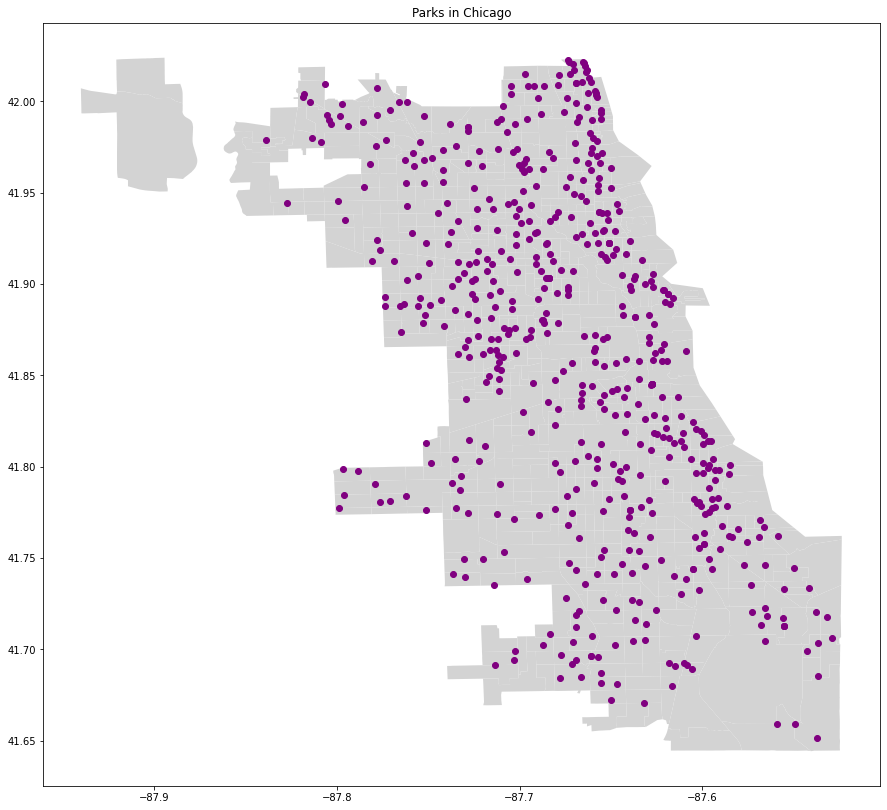

In [31]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
parks_geo.plot(ax = ax, color = 'purple')
ax.set_title('Parks in Chicago')

## Crime

In [32]:
url = "https://data.cityofchicago.org/resource/dfnk-7re6.json"
crime = pd.read_json(url)

In [33]:
crime.tail()

,case_,date_of_occurrence,block,_primary_decsription,fbi_cd,_secondary_description,ward,_location_description,domestic,beat,_iucr,arrest,:@computed_region_43wa_7qmu,location,y_coordinate,latitude,:@computed_region_awaf_s7ux,x_coordinate,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
995,JD461498,2020-12-02T14:23:00.000,015XX W GARFIELD BLVD,THEFT,06,$500 AND UNDER,16,APARTMENT,N,934,0820,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,JD367739,2020-09-11T16:53:00.000,058XX W CORCORAN PL,OTHER OFFENSE,26,OTHER VEHICLE OFFENSE,29,PARKING LOT / GARAGE (NON RESIDENTIAL),Y,1512,5002,N,7.0,"{'latitude': '41.887151764', 'human_address': ...",1901970.0,41.887152,52.0,1137408.0,-87.770858,618.0,22216.0,26.0
997,JD456035,2020-12-11T11:42:00.000,031XX S MICHIGAN AVE,ASSAULT,08A,SIMPLE,3,GAS STATION,N,211,0560,N,9.0,"{'latitude': '41.837871585', 'human_address': ...",1884310.0,41.837872,12.0,1177699.0,-87.623435,25.0,21194.0,1.0
998,JD367306,2020-09-14T18:00:00.000,050XX W HARRISON ST,ROBBERY,03,ARMED - HANDGUN,29,SIDEWALK,N,1533,031A,Y,7.0,"{'latitude': '41.872982979', 'human_address': ...",1896841.0,41.872983,52.0,1142557.0,-87.752077,184.0,22216.0,26.0
999,JD456543,2020-12-11T19:30:00.000,046XX N LAWNDALE AVE,CRIMINAL DAMAGE,14,TO PROPERTY,35,APARTMENT,Y,1723,1310,N,12.0,"{'latitude': '41.965470104', 'human_address': ...",1930603.0,41.965470,2.0,1150886.0,-87.720611,119.0,21849.0,14.0


In [34]:
crime.describe()

,ward,beat,:@computed_region_43wa_7qmu,y_coordinate,latitude,:@computed_region_awaf_s7ux,x_coordinate,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
count,1000.000000,1000.000000,978.000000,9.820000e+02,982.000000,978.000000,9.820000e+02,982.000000,978.000000,982.000000,978.000000
mean,23.503000,1171.705000,24.919223,1.886016e+06,41.842823,27.699387,1.164661e+06,-87.671272,375.046012,19052.959267,38.794479
std,13.829072,710.217939,14.367761,3.278765e+04,0.090165,15.691552,1.644673e+04,0.059847,233.453300,5841.289119,20.596968
min,1.000000,111.000000,1.000000,1.816541e+06,41.651396,1.000000,1.100317e+06,-87.906463,1.000000,4299.000000,1.000000
25%,11.000000,612.000000,12.000000,1.858074e+06,41.765693,13.000000,1.153346e+06,-87.712268,162.250000,21184.000000,24.000000
50%,23.000000,1022.500000,25.000000,1.889472e+06,41.852368,28.000000,1.165641e+06,-87.667105,368.000000,21559.000000,37.000000
75%,34.000000,1731.000000,36.000000,1.910456e+06,41.910063,42.000000,1.176640e+06,-87.627786,580.000000,22236.250000,59.000000
max,50.000000,2535.000000,50.000000,1.951492e+06,42.022526,53.000000,1.203836e+06,-87.529242,801.000000,22620.000000,77.000000


In [35]:
crime.isnull().sum()

case_                           0
date_of_occurrence              0
block                           0
_primary_decsription            0
fbi_cd                          0
_secondary_description          0
ward                            0
_location_description           1
domestic                        0
beat                            0
_iucr                           0
arrest                          0
:@computed_region_43wa_7qmu    22
location                       18
y_coordinate                   18
latitude                       18
:@computed_region_awaf_s7ux    22
x_coordinate                   18
longitude                      18
:@computed_region_bdys_3d7i    22
:@computed_region_6mkv_f3dw    18
:@computed_region_vrxf_vc4k    22
dtype: int64

In [36]:
crime_geo = gpd.GeoDataFrame(crime, geometry = gpd.points_from_xy(crime.longitude, crime.latitude))

Text(0.5, 1.0, 'Crime in Chicago')

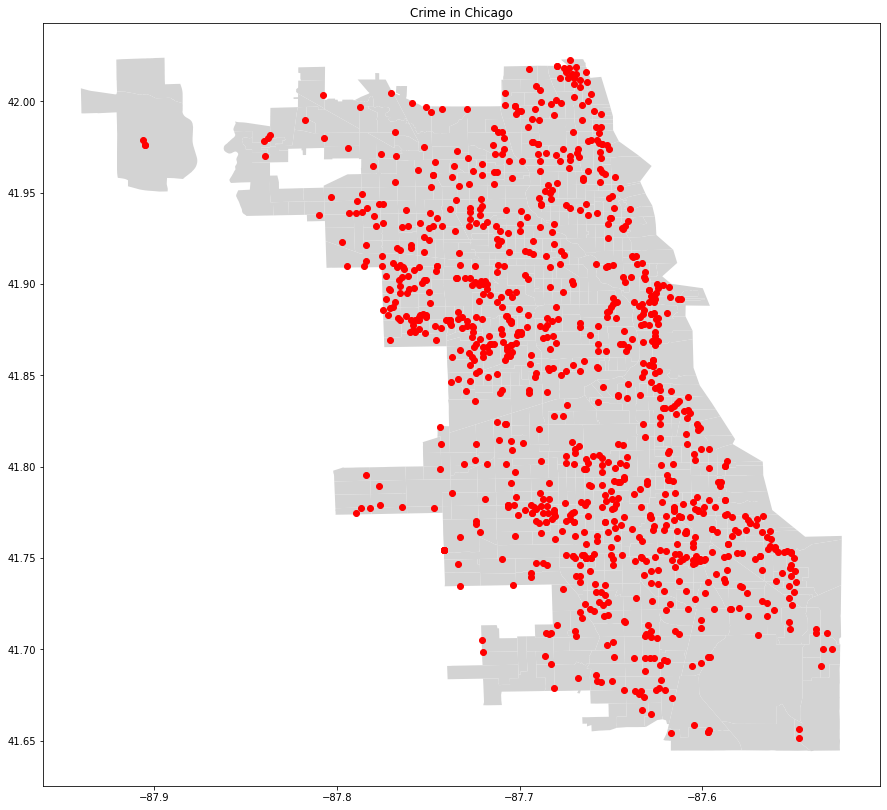

In [37]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
crime_geo.plot(ax = ax, color = 'r')
ax.set_title('Crime in Chicago')

## Energy use

In [38]:
url = "https://data.cityofchicago.org/resource/jn94-it7m.json"
energy_use = pd.read_json(url)

In [39]:
energy_use.head()

,location,benchmarking_id,address,chicago_energy_rating,latitude,exempt_from_chicago_energy_rating,community_area,longitude,property_name,data_year,reporting_status,zip_code,number_of_buildings,primary_property_type_epa_calculated,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
0,"{'latitude': '41.70649646', 'needs_recoding': ...",159005,821 E 103rd St,0.0,41.706496,False,PULLMAN,-87.602690,Corliss HS -CPS,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'latitude': '41.886495', 'needs_recoding': Fa...",256568,363 E Wacker Dr,0.0,41.886495,False,Loop,-87.618105,Vista Tower,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'latitude': '41.75582921', 'needs_recoding': ...",100393,7601 S Cicero Ave,NaN,41.755829,True,WEST LAWN,-87.736993,Ford City Mall,2019,Submitted,60652,1.0,Enclosed Mall,144.1,864923.0,11780942.4,1950.0,112895334.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'latitude': '41.75629268', 'needs_recoding': ...",100395,7500 S Pulaski Ave,0.0,41.756293,False,WEST LAWN,-87.722240,Daley,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'latitude': '42.01036185', 'needs_recoding': ...",100984,1604 1610 W SHERWIN AVE,0.0,42.010362,False,ROGERS PARK,-87.668298,1604 1610 W SHERWIN AVE,2019,Not Submitted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
energy_use.describe()

,benchmarking_id,chicago_energy_rating,latitude,longitude,data_year,number_of_buildings,site_eui_kbtu_sq_ft,property_gross_floor_area_epa_calculated_buildings_sq_ft,natural_gas_use_kbtu,year_built,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kbtu,energy_star_score,weather_normalized_site_eui_kbtu_sq_ft,source_eui_kbtu_sq_ft,water_use_kgal,total_ghg_emissions_metric_tons_co2e,ghg_intensity_metric_tons_co2e_sq_ft,district_chilled_water_use_kbtu,district_steam_use_kbtu
count,1000.000000,920.000000,998.000000,998.000000,1000.0,677.000000,720.000000,6.830000e+02,6.490000e+02,683.000000,7.200000e+02,614.00000,434.000000,440.000000,1.040000e+02,395.000000,395.000000,2.200000e+01,9.000000e+00
mean,114422.582000,2.130435,41.887645,-87.651950,2019.0,1.290990,101.764583,3.610282e+05,1.601003e+07,1962.579795,1.972475e+07,60.90228,102.481106,186.392045,4.991416e+05,4416.759494,10.820506,3.301482e+07,2.759796e+07
std,22403.749921,1.559431,0.067753,0.044804,0.0,2.700996,76.035867,6.578861e+05,4.015014e+07,34.498553,5.513759e+07,26.02791,82.153483,166.535880,3.887669e+06,12958.839127,10.133400,7.758904e+07,4.134044e+07
min,100001.000000,0.000000,41.651404,-87.844645,2019.0,1.000000,13.700000,3.845600e+04,5.300000e+03,1884.000000,5.379790e+04,1.00000,14.600000,19.300000,9.000000e-01,66.000000,1.000000,1.558674e+06,8.347135e+05
25%,102279.750000,0.000000,41.868632,-87.666568,2019.0,1.000000,63.075000,6.954300e+04,3.434230e+06,1928.000000,1.592464e+06,43.25000,63.200000,110.600000,1.929650e+03,540.650000,6.200000,7.742332e+06,4.959146e+06
50%,105988.000000,2.500000,41.887967,-87.638730,2019.0,1.000000,86.500000,1.188900e+05,5.877200e+06,1970.000000,3.965548e+06,66.00000,85.150000,146.900000,4.402050e+03,1155.800000,8.400000,1.331004e+07,1.005348e+07
75%,118746.750000,3.500000,41.934738,-87.627286,2019.0,1.000000,111.825000,3.758525e+05,1.221976e+07,1991.500000,1.514584e+07,81.75000,110.100000,205.225000,1.259015e+04,3400.550000,11.950000,2.619136e+07,2.322449e+07
max,256571.000000,4.000000,42.017989,-87.545829,2019.0,57.000000,1122.600000,9.245333e+06,4.730932e+08,2018.000000,9.923283e+08,100.00000,1122.900000,2556.600000,3.787893e+07,185162.100000,151.500000,3.762233e+08,1.306069e+08


In [41]:
energy_use.isnull().sum()

location                                                                            2
benchmarking_id                                                                     0
address                                                                             0
chicago_energy_rating                                                              80
latitude                                                                            2
exempt_from_chicago_energy_rating                                                   0
community_area                                                                      2
longitude                                                                           2
property_name                                                                      14
data_year                                                                           0
reporting_status                                                                    0
zip_code                                              

In [42]:
energy_geo = gpd.GeoDataFrame(energy_use, geometry = gpd.points_from_xy(energy_use.longitude, energy_use.latitude))

Text(0.5, 1.0, 'Energy consumption points in Chicago')

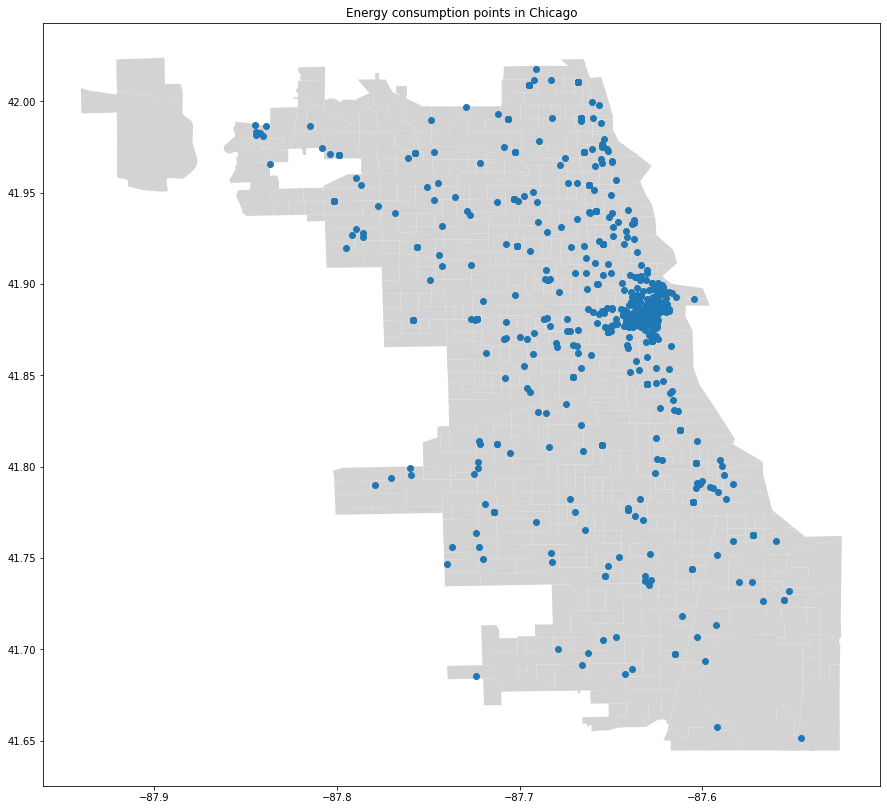

In [43]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
energy_geo.plot(ax = ax)
ax.set_title('Energy consumption points in Chicago')

## Traffic

In [44]:
url = "https://data.cityofchicago.org/resource/pf56-35rv.json"
traffic = pd.read_json(url)

In [45]:
traffic.head()

,:@computed_region_43wa_7qmu,location,vehicle_volume_by_each_direction_of_traffic,date_of_count,:@computed_region_rpca_8um6,latitude,:@computed_region_awaf_s7ux,total_passing_vehicle_volume,traffic_volume_count_location_address,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,street,:@computed_region_vrxf_vc4k,id
0,7.0,"{'latitude': '41.887904', 'needs_recoding': Fa...",East Bound: 3600 / West Bound: 3500,2006-11-14T08:00:00.000Z,32.0,41.887904,52.0,7100,5838 West,-87.771064,672.0,22216,Lake St,26.0,414
1,32.0,"{'latitude': '41.756542', 'needs_recoding': Fa...",East Bound: 3800 / West Bound: 4800,2006-03-28T08:00:00.000Z,61.0,41.756542,31.0,8600,320 East,-87.617335,475.0,21546,76th St,67.0,176
2,33.0,"{'latitude': '41.792663', 'needs_recoding': Fa...",East Bound: 27800 / West Bound: 25700,2006-08-24T07:00:00.000Z,60.0,41.792663,32.0,53500,1730 East,-87.582231,502.0,22260,57th Dr,8.0,1367
3,9.0,"{'latitude': '41.849302', 'needs_recoding': Fa...",East Bound: 400 / West Bound: 300,2006-03-30T08:00:00.000Z,40.0,41.849302,48.0,700,125 East,-87.622658,193.0,21194,24th St,34.0,316
4,47.0,"{'latitude': '41.659177', 'needs_recoding': Fa...",East Bound: 2300 / West Bound: 1900,2006-08-29T07:00:00.000Z,26.0,41.659177,47.0,4200,2924 East,-87.552112,586.0,22250,130th St,52.0,1294


In [46]:
traffic.describe()

,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,latitude,:@computed_region_awaf_s7ux,total_passing_vehicle_volume,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,id
count,988.000000,988.000000,1000.000000,988.000000,1000.0000,1000.000000,987.000000,1000.000000,988.000000,1000.000000
mean,26.825911,32.797571,41.848916,28.551619,19353.4000,-87.669101,369.873354,18451.654000,37.955466,699.205000
std,14.601358,17.527501,0.083795,14.929160,12598.7522,0.060184,237.819918,5737.033204,19.304630,397.998797
min,1.000000,1.000000,41.651861,1.000000,700.0000,-87.846567,1.000000,4299.000000,1.000000,1.000000
25%,13.000000,19.000000,41.779901,16.000000,11100.0000,-87.705867,131.000000,14920.000000,25.000000,359.500000
50%,28.000000,35.000000,41.870306,28.000000,17250.0000,-87.660975,368.000000,21538.000000,37.000000,694.500000
75%,38.000000,46.000000,41.908690,42.000000,24100.0000,-87.628254,579.000000,22212.000000,55.000000,1046.250000
max,50.000000,61.000000,42.017888,53.000000,165200.0000,-87.529702,800.000000,26633.000000,77.000000,1382.000000


In [47]:
traffic.isnull().sum()

:@computed_region_43wa_7qmu                    12
location                                        0
vehicle_volume_by_each_direction_of_traffic     0
date_of_count                                   0
:@computed_region_rpca_8um6                    12
latitude                                        0
:@computed_region_awaf_s7ux                    12
total_passing_vehicle_volume                    0
traffic_volume_count_location_address           0
longitude                                       0
:@computed_region_bdys_3d7i                    13
:@computed_region_6mkv_f3dw                     0
street                                          0
:@computed_region_vrxf_vc4k                    12
id                                              0
dtype: int64

In [48]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   :@computed_region_43wa_7qmu                  988 non-null    float64
 1   location                                     1000 non-null   object 
 2   vehicle_volume_by_each_direction_of_traffic  1000 non-null   object 
 3   date_of_count                                1000 non-null   object 
 4   :@computed_region_rpca_8um6                  988 non-null    float64
 5   latitude                                     1000 non-null   float64
 6   :@computed_region_awaf_s7ux                  988 non-null    float64
 7   total_passing_vehicle_volume                 1000 non-null   int64  
 8   traffic_volume_count_location_address        1000 non-null   object 
 9   longitude                                    1000 non-null   float64
 10  :

In [49]:
traffic_geo = gpd.GeoDataFrame(traffic, geometry = gpd.points_from_xy(traffic.longitude, traffic.latitude))

Text(0.5, 1.0, 'Traffic in Chicago')

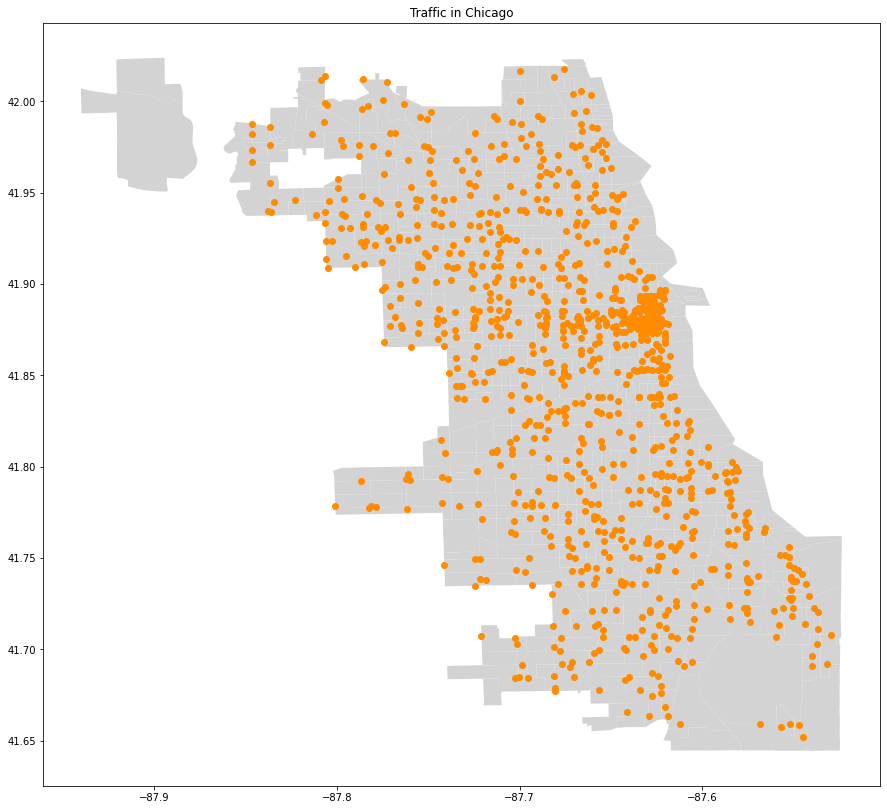

In [50]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
traffic_geo.plot(ax = ax, color='darkorange')
ax.set_title('Traffic in Chicago')

## Air quality

In [51]:
url_air_quality = 'https://data.cityofchicago.org/resource/i9rk-duva.json'
air_quality = pd.read_json(url_air_quality)

In [52]:
air_quality.head()

,inspection_number,modified_date,site_name,map_address,street_number,direction,street_name,street_type,inspection_type,inspection_sub_category,inspector,inspection_date,narrative,data_source,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,692338,2021-09-07T00:00:00.000,BOND CORP,4235 W ANN LURIE PL,4235,W,ANN LURIE,PL,DOE AIR QUALITY,AIR QUALITY INSPECTION,29520,2015-11-10T00:00:00.000,"Tried to air pollution P2inspect Bond Corp, bu...",DEPT. OF PUBLIC HEALTH,41.816167,-87.729974,"{'type': 'Point', 'coordinates': [-87.72997439...",56.0,54.0,22248.0,591.0,8.0
1,714018,2021-09-07T00:00:00.000,"NAPUCK SALVAGE OF WAUPECA, LLC",11610 S AVENUE O,11610,S,AVENUE O,NaN,DOE RECYCLING FACILITY,SOLID WASTE INSPECTIONS,13776,2015-10-15T00:00:00.000,Periodic inspection for Permit compliance.\n\n...,DEPT. OF PUBLIC HEALTH,41.684216,-87.540273,"{'type': 'Point', 'coordinates': [-87.54027295...",25.0,49.0,21202.0,603.0,47.0
2,510991,2021-09-07T00:00:00.000,SIM'S RAIL YARD FACILITY,3200 E 96TH ST,3200,E,96TH,ST,DOE RECYCLING FACILITY,SOLID WASTE INSPECTIONS,10937,2013-10-23T00:00:00.000,Sims Metal Managent facility 3200 E. 96th St. ...,DEPT. OF PUBLIC HEALTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527747,2021-09-07T00:00:00.000,CARBIT PAINT COMPANY,927 W BLACKHAWK ST,927,W,BLACKHAWK,ST,DOE AIR QUALITY,AIR QUALITY INSPECTION,29520,2016-04-14T00:00:00.000,"Duplicate assignment, for results see insp. # ...",DEPT. OF PUBLIC HEALTH,41.908026,-87.651883,"{'type': 'Point', 'coordinates': [-87.65188288...",49.0,37.0,22620.0,108.0,46.0
4,532697,2021-09-07T00:00:00.000,"NAPUCK SALVAGE OF WAUPECA, LLC",11610 S AVENUE O,11610,S,AVENUE O,NaN,DOE RECYCLING FACILITY,SOLID WASTE INSPECTIONS,13776,2014-10-14T00:00:00.000,Facility receives various metals but mainly en...,DEPT. OF PUBLIC HEALTH,41.684216,-87.540273,"{'type': 'Point', 'coordinates': [-87.54027295...",25.0,49.0,21202.0,603.0,47.0


In [53]:
air_quality.describe()

,inspection_number,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1.000000e+03,1000.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,1.062138e+06,3037.580000,41.865467,-87.680716,27.364205,40.510638,19203.387985,350.110138,34.147685
std,4.797880e+05,2914.881885,0.078650,0.054542,13.363297,19.165473,5311.145692,231.094823,13.656205
min,4.166880e+05,210.000000,41.673267,-87.905309,1.000000,6.000000,4299.000000,23.000000,1.000000
25%,5.254775e+05,1633.000000,41.837146,-87.707341,16.000000,25.000000,21184.000000,99.000000,23.000000
50%,1.064553e+06,2040.000000,41.887862,-87.672053,28.000000,29.000000,21190.000000,269.000000,40.000000
75%,1.551920e+06,3200.000000,41.919854,-87.666500,30.000000,59.000000,21572.000000,579.000000,46.000000
max,1.724044e+06,12200.000000,42.021975,-87.540273,61.000000,75.000000,22620.000000,796.000000,50.000000


In [54]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inspection_number            1000 non-null   int64  
 1   modified_date                1000 non-null   object 
 2   site_name                    983 non-null    object 
 3   map_address                  1000 non-null   object 
 4   street_number                1000 non-null   int64  
 5   direction                    1000 non-null   object 
 6   street_name                  1000 non-null   object 
 7   street_type                  945 non-null    object 
 8   inspection_type              1000 non-null   object 
 9   inspection_sub_category      1000 non-null   object 
 10  inspector                    987 non-null    object 
 11  inspection_date              987 non-null    object 
 12  narrative                    1000 non-null   object 
 13  data_source        

In [55]:
air_quality.isnull().sum()

inspection_number                0
modified_date                    0
site_name                       17
map_address                      0
street_number                    0
direction                        0
street_name                      0
street_type                     55
inspection_type                  0
inspection_sub_category          0
inspector                       13
inspection_date                 13
narrative                        0
data_source                      0
latitude                       201
longitude                      201
location                       201
:@computed_region_rpca_8um6    201
:@computed_region_vrxf_vc4k    201
:@computed_region_6mkv_f3dw    201
:@computed_region_bdys_3d7i    201
:@computed_region_43wa_7qmu    201
dtype: int64

In [56]:
air_quality_geo = gpd.GeoDataFrame(air_quality, geometry = gpd.points_from_xy(air_quality.longitude, air_quality.latitude))

Text(0.5, 1.0, 'Air Quality in Chicago')

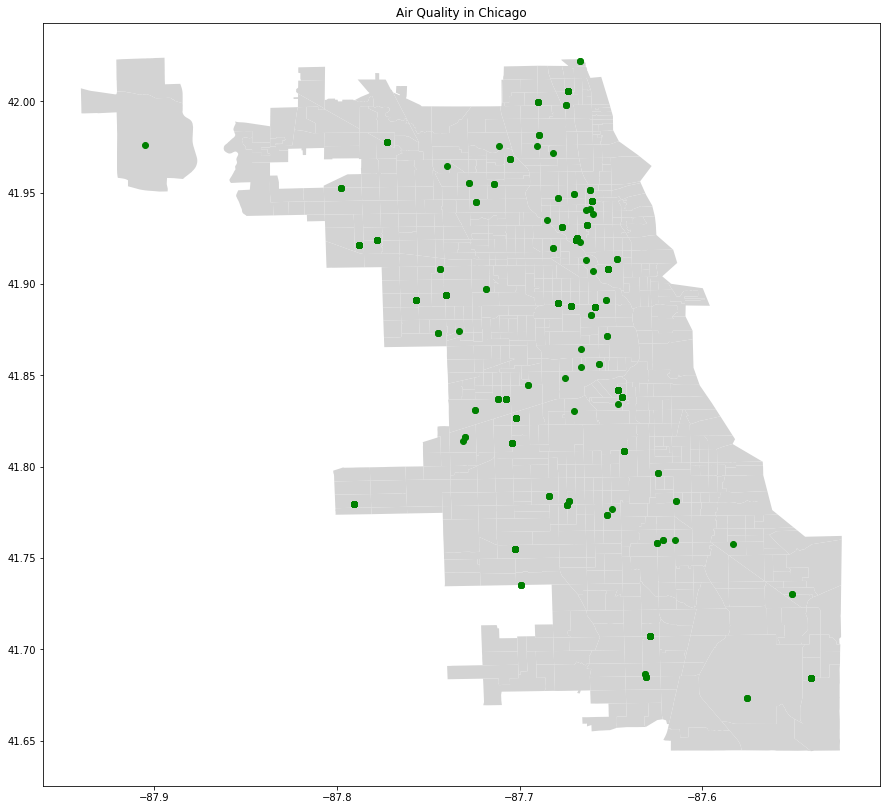

In [57]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
air_quality_geo.plot(ax = ax, color='g')
ax.set_title('Air Quality in Chicago')

## Building permit

In [58]:
building_permit_api = 'https://data.cityofchicago.org/resource/building-permits.json'
building_permit = pd.read_json(building_permit_api)

In [59]:
building_permit.head()

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,suffix,work_description,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,contact_1_type,contact_1_name,contact_1_city,contact_1_state,contact_1_zipcode,reported_cost,pin1,community_area,ward,census_tract,contact_2_type,contact_2_name,contact_2_city,contact_2_state,contact_2_zipcode,...,contact_5_name,contact_5_city,contact_5_state,contact_5_zipcode,contact_6_type,contact_6_name,contact_6_city,contact_6_state,contact_6_zipcode,contact_7_type,contact_7_name,contact_7_city,contact_7_state,contact_7_zipcode,contact_8_type,contact_8_name,contact_8_city,contact_8_state,contact_8_zipcode,contact_9_type,contact_9_name,contact_9_city,contact_9_state,contact_9_zipcode,contact_10_type,contact_10_name,contact_10_city,contact_10_state,contact_10_zipcode,contact_11_type,contact_11_name,contact_11_city,contact_11_state,contact_11_zipcode,contact_12_type,contact_12_name,contact_12_city,contact_12_state,contact_12_zipcode,pin8
0,1830273,100190752,PERMIT - SIGNS,SIGN PERMIT,2007-10-16T00:00:00.000,2008-03-05T00:00:00.000,1970-01-01 00:02:21,6349,S,COTTAGE GROVE,AVE,INSTALL BUILDING SIGN,70.0,75,0.0,145.0,0.0,0,0,0.0,0.0,0,0,0.0,145.0,SIGN CONTRACTOR,JAS. D. AHERN CO.,CHICAGO X,IL,60623,2000.0,20-23-100-005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2060019,100296510,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2009-06-15T00:00:00.000,2009-06-15T00:00:00.000,1970-01-01 00:00:00,10000,N,BESSIE COLEMAN,DR,LOW VOLTAGE,50.0,0,0.0,50.0,0.0,0,0,0.0,0.0,0,0,0.0,50.0,CONTRACTOR-ELECTRICAL,ELITE ELECTRIC CO. INC.,MELROSE PARK,IL,60160,70000.0,NaN,76.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1671981,100108067,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2006-04-17T00:00:00.000,2006-04-17T00:00:00.000,1970-01-01 00:00:00,7535,N,HERMITAGE,AVE,ADD CIRCUITS FOR COMPUTERS.,40.0,0,0.0,40.0,0.0,0,0,0.0,0.0,0,0,0.0,40.0,CONTRACTOR-ELECTRICAL,"PACE SYSTEMS, INC.",NAPERVILLE,IL,60563-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2832499,100696131,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-03-20T00:00:00.000,2017-03-20T00:00:00.000,1970-01-01 00:00:00,150,N,RIVERSIDE,PLZ,LOW VOLTAGE CABLING FOR 18TH & 25TH FLOOR BUIL...,150.0,0,0.0,150.0,0.0,0,0,0.0,0.0,0,0,0.0,150.0,CONTRACTOR-ELECTRICAL,PAUL M CARUSO,LOMBARD,IL,60148-,39600.0,NaN,28.0,42.0,2801.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3053734,100830913,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2019-07-17T00:00:00.000,2019-07-17T00:00:00.000,1970-01-01 00:00:00,4001,N,RAVENSWOOD,AVE,ATT IL01735G NR UPGRADE - 850: SWAP (3) EXIST ...,300.0,0,0.0,300.0,0.0,0,0,0.0,0.0,0,0,0.0,300.0,CONTRACTOR-ELECTRICAL,BRIAN K PETERSEN,ELGIN,IL,60124-,15000.0,14-18-420-031,6.0,47.0,60200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
building_permit.describe()

,id,permit_,street_number,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,reported_cost,community_area,ward,census_tract,xcoordinate,ycoordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,contact_11_zipcode,contact_12_zipcode
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,622.000000,602.000000,582.000000,4.710000e+02,4.710000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.0,1.0
mean,2.218214e+06,9.998555e+07,4190.473000,931.177420,42.238000,48.871250,1022.286670,18.520100,0.0,0.300000,18.82010,287.738750,2.150000,1.32700,291.215750,1332.322520,2.658420e+05,30.385852,30.717608,144392.991409,1.164283e+06,1.903467e+06,41.915138,-87.663923,24.807407,41.111111,17939.407407,451.044444,31.385185,26.488889,60618.0,60647.0
std,4.873406e+05,6.340210e+06,4690.051738,9957.340142,81.418206,321.790248,9978.410455,565.465723,0.0,4.464295,565.47351,2628.669037,13.894984,39.66032,2637.171017,10379.437235,3.565708e+06,24.734838,14.447334,286769.473477,1.533825e+04,2.898836e+04,0.041886,0.029057,17.143162,18.950709,6297.419688,247.975019,11.472215,14.503148,NaN,NaN
min,8.815490e+05,5.369700e+04,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,40.000000,0.000000e+00,1.000000,1.000000,106.000000,1.120297e+06,1.817559e+06,41.693262,-87.764903,1.000000,2.000000,4301.000000,17.000000,3.000000,1.000000,60618.0,60647.0
25%,1.824712e+06,1.001877e+08,1729.000000,50.000000,0.000000,0.000000,50.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,50.000000,8.675000e+01,7.000000,20.000000,1255.000000,1.157012e+06,1.886176e+06,41.903348,-87.680786,16.000000,25.000000,14926.000000,211.000000,23.000000,16.000000,60618.0,60647.0
50%,2.058126e+06,1.002956e+08,2630.000000,75.000000,0.000000,0.000000,125.250000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,150.000000,2.500000e+03,28.000000,35.000000,3451.500000,1.166764e+06,1.915158e+06,41.919721,-87.664137,22.000000,38.000000,21190.000000,481.000000,34.000000,22.000000,60618.0,60647.0
75%,2.535355e+06,1.005263e+08,6349.000000,266.250000,75.000000,0.000000,325.500000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,375.000000,2.000000e+04,42.000000,42.000000,71000.000000,1.172303e+06,1.921111e+06,41.939163,-87.646064,39.000000,57.000000,21560.000000,672.500000,40.000000,38.000000,60618.0,60647.0
max,3.203489e+06,1.009347e+08,111601.000000,300888.420000,1500.000000,4603.000000,300963.420000,17880.100000,0.0,75.000000,17880.10000,41485.500000,225.000000,1252.00000,41560.500000,300963.420000,8.325000e+07,77.000000,50.000000,980000.000000,1.199555e+06,1.950305e+06,41.994910,-87.595285,56.000000,68.000000,22620.000000,797.000000,50.000000,51.000000,60618.0,60647.0


In [61]:
building_permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 108 entries, id to pin8
dtypes: datetime64[ns](1), float64(24), int64(8), object(75)
memory usage: 843.9+ KB


In [62]:
building_permit.isnull().sum()

id                          0
permit_                     0
permit_type                 0
review_type                 0
application_start_date      3
                         ... 
contact_12_name           999
contact_12_city           999
contact_12_state          999
contact_12_zipcode        999
pin8                      999
Length: 108, dtype: int64

In [63]:
building_permit_geo = gpd.GeoDataFrame(building_permit, geometry = gpd.points_from_xy(building_permit.longitude, building_permit.latitude))

Text(0.5, 1.0, 'Building permits in Chicago')

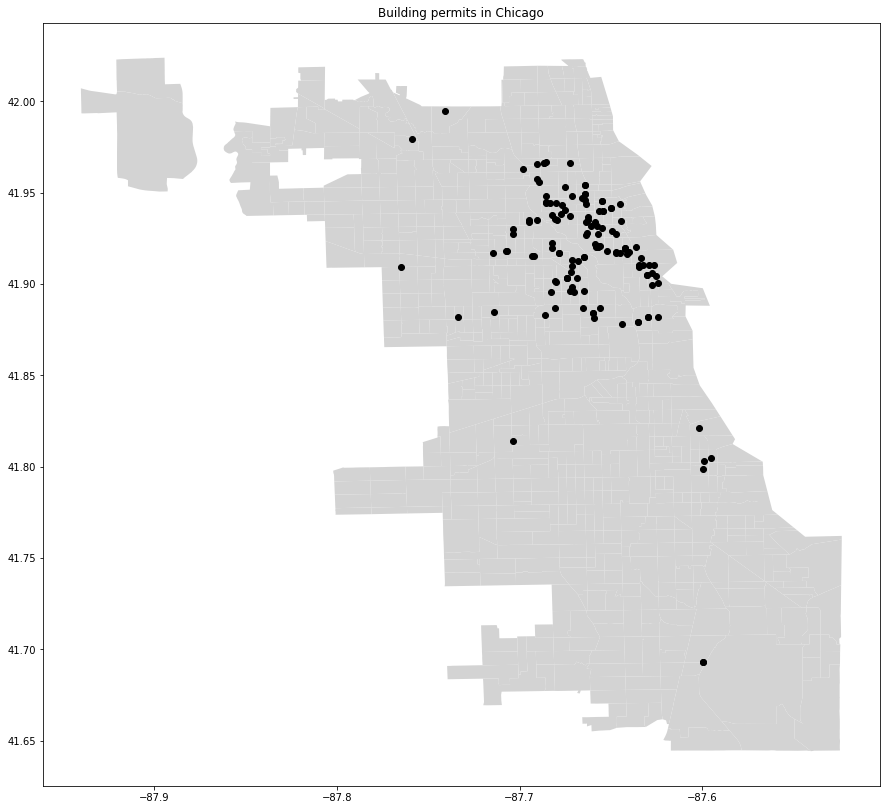

In [64]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
building_permit_geo.plot(ax = ax, color='black')
ax.set_title('Building permits in Chicago')

## Beach Weather

In [65]:
beach_api = 'https://data.cityofchicago.org/resource/g3ip-u8rb.json'
beach_weather = pd.read_json(beach_api)

In [66]:
beach_weather.head()

,sensor_name,sensor_type,latitude,longitude,location,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
0,63rd Street Beach,Water,41.784561,-87.571453,"{'latitude': '41.784561', 'longitude': '-87.57...",22260,469,NaN,NaN,NaN
1,Calumet Beach,Water,41.714739,-87.527356,"{'latitude': '41.714739', 'longitude': '-87.52...",21202,705,NaN,NaN,NaN
2,Montrose Beach,Water,41.969094,-87.638003,"{'latitude': '41.969094', 'longitude': '-87.63...",21186,636,NaN,NaN,NaN
3,Ohio Street Beach,Water,41.894328,-87.613083,"{'latitude': '41.894328', 'longitude': '-87.61...",21182,159,NaN,NaN,NaN
4,Osterman Beach,Water,41.987675,-87.651008,"{'latitude': '41.987675', 'longitude': '-87.65...",4451,14,NaN,NaN,NaN


In [67]:
beach_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sensor_name                  9 non-null      object 
 1   sensor_type                  9 non-null      object 
 2   latitude                     9 non-null      float64
 3   longitude                    9 non-null      float64
 4   location                     9 non-null      object 
 5   :@computed_region_6mkv_f3dw  9 non-null      int64  
 6   :@computed_region_bdys_3d7i  9 non-null      int64  
 7   :@computed_region_awaf_s7ux  3 non-null      float64
 8   :@computed_region_vrxf_vc4k  3 non-null      float64
 9   :@computed_region_43wa_7qmu  3 non-null      float64
dtypes: float64(5), int64(2), object(3)
memory usage: 848.0+ bytes


In [68]:
beach_weather.describe()

,latitude,longitude,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_awaf_s7ux,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
count,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,3.000000
mean,41.863333,-87.599327,19875.222222,401.444444,31.333333,25.666667,20.000000
std,0.104650,0.045175,5817.828456,251.990134,9.018500,14.742230,11.532563
min,41.714739,-87.651008,4451.000000,14.000000,22.000000,9.000000,11.000000
25%,41.780992,-87.638003,21182.000000,159.000000,27.000000,20.000000,13.500000
50%,41.894328,-87.613083,21202.000000,469.000000,32.000000,31.000000,16.000000
75%,41.969094,-87.571453,22260.000000,635.000000,36.000000,34.000000,24.500000
max,41.987675,-87.527356,22616.000000,705.000000,40.000000,37.000000,33.000000


In [69]:
beach_weather_geo = gpd.GeoDataFrame(beach_weather, geometry = gpd.points_from_xy(beach_weather.longitude, beach_weather.latitude))

Text(0.5, 1.0, 'Beach weather sensor in Chicago')

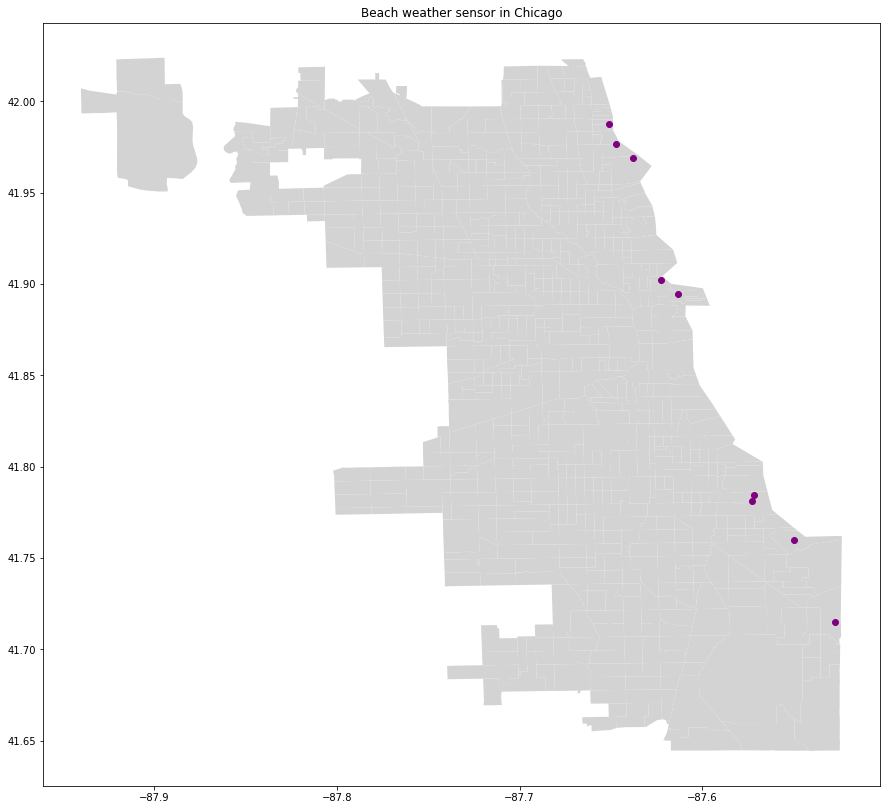

In [70]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
beach_weather_geo.plot(ax = ax, color = 'purple')
ax.set_title('Beach weather sensor in Chicago')

## Graffiti

In [71]:
graffiti_api = 'https://data.cityofchicago.org/resource/8tus-apua.json'
graffiti = pd.read_json(graffiti_api)

In [72]:
graffiti.head()

,:@computed_region_43wa_7qmu,zip_code,location,y_coordinate,where_is_the_graffiti_located_,completion_date,latitude,:@computed_region_awaf_s7ux,community_area,what_type_of_surface_is_the_graffiti_on_,x_coordinate,ward,street_address,police_district,longitude,:@computed_region_bdys_3d7i,status,:@computed_region_6mkv_f3dw,creation_date,service_request_number,type_of_service_request,:@computed_region_vrxf_vc4k,ssa
0,23.0,60644.0,"{'latitude': '41.884591582851', 'needs_recodin...",1.901048e+06,Garage,2018-12-19T00:00:00.000,41.884592,11.0,25.0,Vinyl Siding,1.145010e+06,28.0,4700 W MAYPOLE AVE,11.0,-87.743089,696.0,Completed,22216.0,2018-12-18T00:00:00.000,18-03387473,Graffiti Removal,26.0,NaN
1,50.0,60630.0,"{'latitude': '41.967890500498', 'needs_recodin...",1.931358e+06,Front,2018-12-19T00:00:00.000,41.967891,20.0,15.0,"Cement (Sidewalk, Alley, Wall, Curb)",1.138135e+06,45.0,5600 W LAWRENCE AVE,16.0,-87.767602,94.0,Completed,21869.0,2018-12-18T00:00:00.000,18-03388557,Graffiti Removal,15.0,NaN
2,46.0,60642.0,"{'latitude': '41.894229784229', 'needs_recodin...",1.904811e+06,Side,2018-12-19T00:00:00.000,41.894230,41.0,24.0,Brick - Unpainted,1.169638e+06,27.0,694 N MILWAUKEE AVE,12.0,-87.652521,522.0,Completed,22620.0,2018-12-18T00:00:00.000,18-03388870,Graffiti Removal,25.0,29.0
3,26.0,60605.0,"{'latitude': '41.872102296637', 'needs_recodin...",1.896780e+06,Rear,2018-12-19T00:00:00.000,41.872102,48.0,32.0,"Cement (Sidewalk, Alley, Wall, Curb)",1.175006e+06,25.0,801 S FINANCIAL PL,1.0,-87.632797,12.0,Completed,14917.0,2018-12-18T00:00:00.000,18-03388831,Graffiti Removal,38.0,NaN
4,26.0,60608.0,"{'latitude': '41.847654472993', 'needs_recodin...",1.887779e+06,Side,NaN,41.847654,8.0,31.0,Brick - Unpainted,1.162830e+06,25.0,2455 S BLUE ISLAND AVE,10.0,-87.677733,126.0,Open,14920.0,2018-12-18T00:00:00.000,18-03388464,Graffiti Removal,33.0,NaN


In [73]:
graffiti.describe()

,:@computed_region_43wa_7qmu,zip_code,y_coordinate,latitude,:@computed_region_awaf_s7ux,community_area,x_coordinate,ward,police_district,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,ssa
count,998.000000,999.000000,9.970000e+02,999.000000,998.000000,997.000000,9.970000e+02,997.000000,997.000000,999.000000,998.000000,999.000000,998.000000,272.000000
mean,22.581162,60565.101101,1.904667e+06,41.894155,23.509018,28.827482,1.159896e+06,28.284855,14.104313,-87.688396,372.485972,19222.222222,37.493988,32.044118
std,14.674842,1918.177979,2.495733e+04,0.068641,14.409174,21.644265,1.005560e+04,14.297088,5.908536,0.036973,250.815559,4956.430609,18.797380,13.293379
min,1.000000,0.000000,1.815904e+06,41.648911,2.000000,0.000000,1.125332e+06,0.000000,0.000000,-87.814275,2.000000,4299.000000,1.000000,1.000000
25%,10.000000,60614.000000,1.885560e+06,41.841646,13.000000,8.000000,1.154069e+06,14.000000,9.000000,-87.709937,148.500000,14924.000000,22.000000,24.000000
50%,20.000000,60623.000000,1.911855e+06,41.913813,22.000000,22.000000,1.160023e+06,30.000000,14.000000,-87.687477,324.000000,21538.000000,33.000000,33.000000
75%,36.000000,60639.000000,1.924724e+06,41.949079,35.000000,49.000000,1.166150e+06,42.000000,19.000000,-87.664996,613.000000,22248.000000,56.000000,38.000000
max,50.000000,60707.000000,1.950362e+06,42.019398,53.000000,77.000000,1.202096e+06,50.000000,25.000000,-87.536386,801.000000,22620.000000,77.000000,60.000000


In [74]:
graffiti.isnull().sum()

:@computed_region_43wa_7qmu                   2
zip_code                                      1
location                                      1
y_coordinate                                  3
where_is_the_graffiti_located_                1
completion_date                             146
latitude                                      1
:@computed_region_awaf_s7ux                   2
community_area                                3
what_type_of_surface_is_the_graffiti_on_      1
x_coordinate                                  3
ward                                          3
street_address                                0
police_district                               3
longitude                                     1
:@computed_region_bdys_3d7i                   2
status                                        0
:@computed_region_6mkv_f3dw                   1
creation_date                                 0
service_request_number                        0
type_of_service_request                 

In [75]:
graffiti_geo = gpd.GeoDataFrame(graffiti, geometry = gpd.points_from_xy(graffiti.longitude, graffiti.latitude))

Text(0.5, 1.0, 'Graffiti in Chicago')

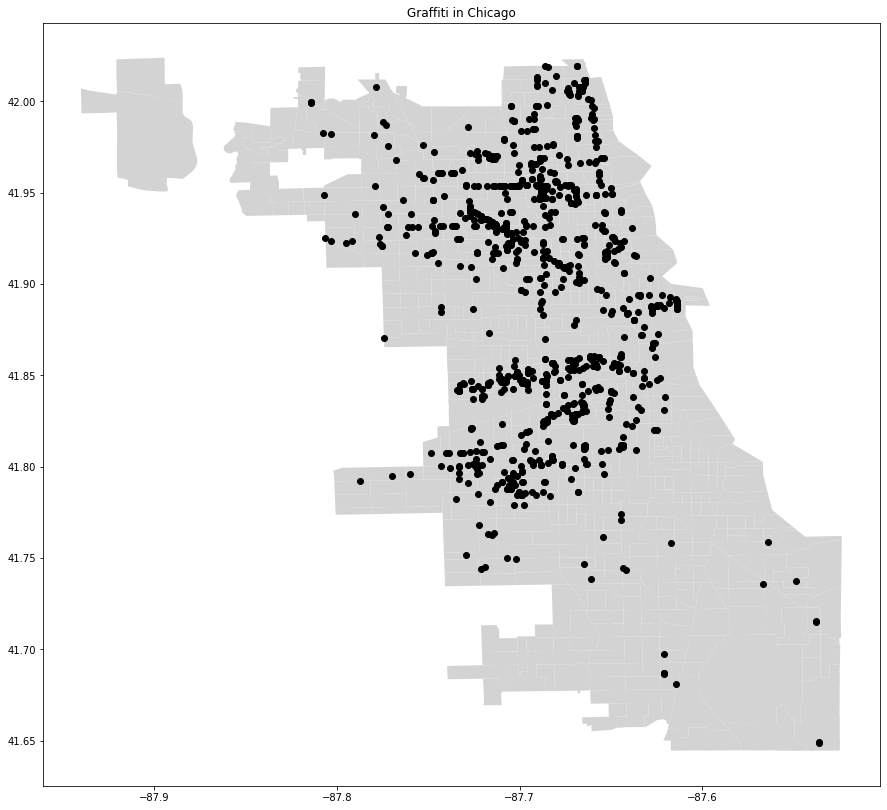

In [76]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
graffiti_geo.plot(ax = ax, color = 'black')
ax.set_title('Graffiti in Chicago')

## Flu shots

In [77]:
flu_api = 'https://data.cityofchicago.org/resource/w3hg-pyhz.json'
flu_shot = pd.read_json(flu_api)

In [78]:
flu_shot.describe()

,facility_id,latitude,longitude,postal_code,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,999.000000,999.000000
mean,142.075000,41.866855,-87.675321,60628.175000,30.440440,39.588589,18240.593000,377.582583,27.213213
std,86.480855,0.088522,0.056748,19.287156,18.432627,19.536408,6142.593682,237.546917,13.705227
min,1.000000,41.506810,-87.822700,60411.000000,1.000000,1.000000,4299.000000,2.000000,1.000000
25%,67.000000,41.794092,-87.713505,60614.000000,15.000000,25.000000,14920.000000,158.000000,16.000000
50%,136.000000,41.883700,-87.665825,60625.500000,29.000000,37.000000,21538.000000,365.000000,28.000000
75%,216.000000,41.938800,-87.635360,60641.000000,46.000000,57.000000,22216.000000,581.500000,38.000000
max,304.000000,42.018000,-87.535300,60707.000000,61.000000,77.000000,26902.000000,794.000000,50.000000


In [79]:
flu_shot.isnull().sum()

season                           0
facility_id                      0
latitude                         0
longitude                        0
street1                          0
city                             0
state                            0
postal_code                      0
country                          0
facility_name                    0
begin_date                       0
end_date                         0
begin_time                     719
end_time                       719
begin_datetime                 719
end_datetime                   719
recurrence_days                  0
cost                             0
record_id                        0
location                         0
:@computed_region_rpca_8um6      1
:@computed_region_vrxf_vc4k      1
:@computed_region_6mkv_f3dw      0
:@computed_region_bdys_3d7i      1
:@computed_region_43wa_7qmu      1
url                            281
phone                          281
hours                          281
street2             

In [80]:
flu_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   season                       1000 non-null   object        
 1   facility_id                  1000 non-null   int64         
 2   latitude                     1000 non-null   float64       
 3   longitude                    1000 non-null   float64       
 4   street1                      1000 non-null   object        
 5   city                         1000 non-null   object        
 6   state                        1000 non-null   object        
 7   postal_code                  1000 non-null   int64         
 8   country                      1000 non-null   object        
 9   facility_name                1000 non-null   object        
 10  begin_date                   1000 non-null   object        
 11  end_date                     1000 non-null  

In [81]:
flu_shot_geo = gpd.GeoDataFrame(flu_shot, geometry = gpd.points_from_xy(flu_shot.longitude, flu_shot.latitude))

Text(0.5, 1.0, 'Flu shots in Chicago')

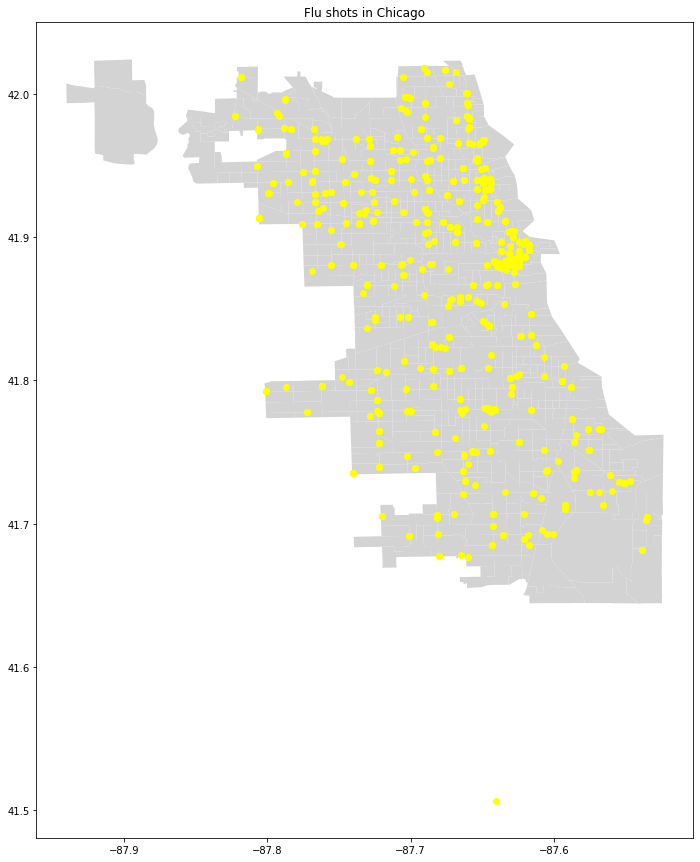

In [82]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
flu_shot_geo.plot(ax = ax, color = 'yellow')
ax.set_title('Flu shots in Chicago')

## Environmental Inspections

In [83]:
env_insp_api = 'https://data.cityofchicago.org/resource/i9rk-duva.json'
env_insp = pd.read_json(env_insp_api)

In [84]:
env_insp.describe()

,inspection_number,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1.000000e+03,1000.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,1.054093e+06,3052.638000,41.865567,-87.680522,27.533251,40.284483,19233.389163,353.859606,34.349754
std,4.787599e+05,2935.136141,0.078584,0.054199,13.337232,18.982869,5278.873712,232.345840,13.626092
min,4.166880e+05,210.000000,41.673267,-87.905309,1.000000,6.000000,4299.000000,20.000000,1.000000
25%,5.261982e+05,1633.000000,41.837220,-87.707341,16.000000,25.000000,21184.000000,99.000000,23.000000
50%,1.053066e+06,2040.000000,41.887862,-87.672053,28.000000,29.000000,21190.000000,275.000000,40.000000
75%,1.541898e+06,3200.000000,41.915050,-87.668515,30.000000,58.000000,21572.000000,579.000000,46.000000
max,1.724044e+06,12200.000000,42.021975,-87.540273,61.000000,75.000000,22620.000000,796.000000,50.000000


In [85]:
env_insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inspection_number            1000 non-null   int64  
 1   modified_date                1000 non-null   object 
 2   site_name                    983 non-null    object 
 3   map_address                  1000 non-null   object 
 4   street_number                1000 non-null   int64  
 5   direction                    1000 non-null   object 
 6   street_name                  1000 non-null   object 
 7   inspection_type              1000 non-null   object 
 8   inspection_sub_category      1000 non-null   object 
 9   inspector                    985 non-null    object 
 10  inspection_date              985 non-null    object 
 11  narrative                    1000 non-null   object 
 12  data_source                  1000 non-null   object 
 13  latitude           

In [86]:
env_insp.isnull().sum()

inspection_number                0
modified_date                    0
site_name                       17
map_address                      0
street_number                    0
direction                        0
street_name                      0
inspection_type                  0
inspection_sub_category          0
inspector                       15
inspection_date                 15
narrative                        0
data_source                      0
latitude                       188
longitude                      188
location                       188
:@computed_region_rpca_8um6    188
:@computed_region_vrxf_vc4k    188
:@computed_region_6mkv_f3dw    188
:@computed_region_bdys_3d7i    188
:@computed_region_43wa_7qmu    188
street_type                     55
dtype: int64

In [87]:
env_insp_geo = gpd.GeoDataFrame(env_insp, geometry = gpd.points_from_xy(env_insp.longitude, env_insp.latitude))

Text(0.5, 1.0, 'Environmental Inspections in Chicago')

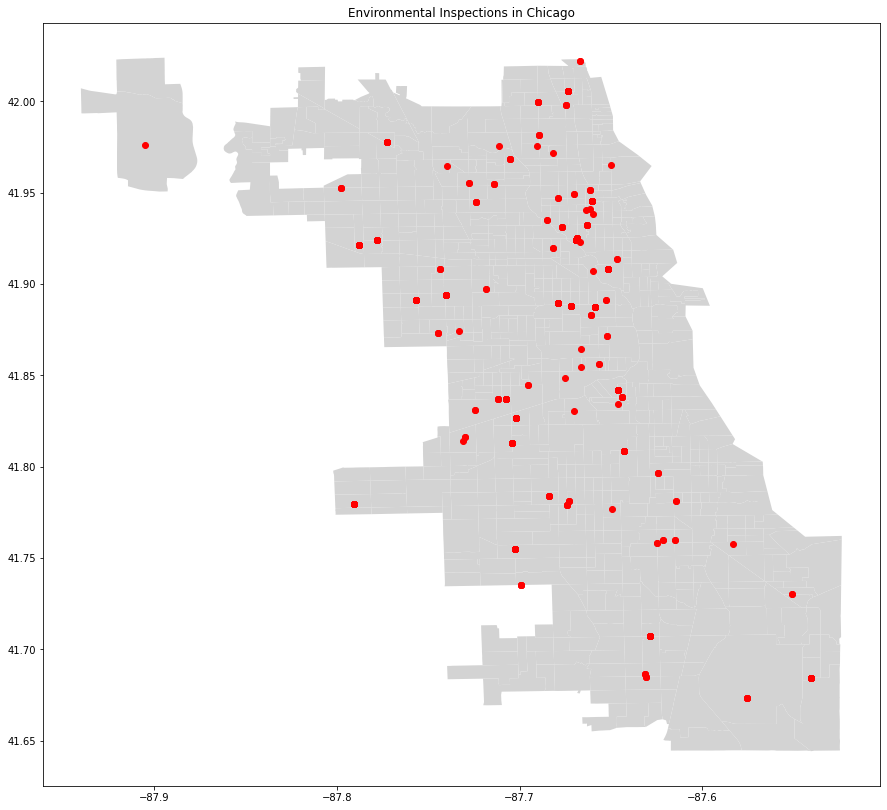

In [88]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
env_insp_geo.plot(ax = ax, color = 'red')
ax.set_title('Environmental Inspections in Chicago')

## Environmental Complanints

In [89]:
env_complaints_api = 'https://data.cityofchicago.org/resource/fypr-ksnz.json'
env_complaints = pd.read_json(env_complaints_api)

In [90]:
env_complaints.head()

,complaint_id,complaint_type,address,street_number,direction,street_name,street_type,inspector,complaint_date,complaint_detail,inspection_log,data_source,modified_date,street_number_to,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,DOECOMP2,Noise Complaint,"1 S STATE ST, CHICAGO, IL",1,S,STATE,ST,10,1993-08-23T00:00:00.000,STREET MUSIC HEAVY NOISE POLLUTION REFERRED TO...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DOECOMP73,Noise Complaint,"10 S WACKER DR, CHICAGO, IL",10,S,WACKER,DR,25,1993-04-02T00:00:00.000,SAXOPHONE PLAYING ON MADISON.,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOECOMP90,Asbestos Work Order,"100 E OHIO ST, CHICAGO, IL",100,E,OHIO,ST,13,1994-11-08T00:00:00.000,GREEN TRAVEL FINE DUST ...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DOECOMP80,Toxics Hazardous Materials Work Order,"10 S WACKER DR, CHICAGO, IL",10,S,WACKER,DR,17,1993-01-27T00:00:00.000,TOXIC ODORS ON 37TH FLOOR AT ABOVE ADDRESS.,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DOECOMP236,Illegal Dumping Work Order,"10000 S STONY ISLAND AVE, CHICAGO, IL",10000,S,STONY ISLAND,AVE,10,1995-10-26T00:00:00.000,RESIDENTIAL AREA FLY DUMPIN...,MORE INFORMATION MAY BE AVAILABLE IN THE CDPH ...,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
env_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   complaint_id                 1000 non-null   object 
 1   complaint_type               1000 non-null   object 
 2   address                      1000 non-null   object 
 3   street_number                1000 non-null   int64  
 4   direction                    1000 non-null   object 
 5   street_name                  1000 non-null   object 
 6   street_type                  987 non-null    object 
 7   inspector                    964 non-null    object 
 8   complaint_date               999 non-null    object 
 9   complaint_detail             950 non-null    object 
 10  inspection_log               1000 non-null   object 
 11  data_source                  1000 non-null   object 
 12  modified_date                1000 non-null   object 
 13  street_number_to   

In [92]:
env_complaints.describe()

,street_number,street_number_to,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1000.000000,31.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,3673.171000,3764.903226,41.848306,-87.658274,29.744493,39.035242,19599.929515,428.810573,29.176211
std,2710.433632,3003.929453,0.090382,0.064147,18.444029,18.608414,4907.643493,214.226462,14.772755
min,1.000000,77.000000,41.688286,-87.812963,1.000000,1.000000,4299.000000,3.000000,1.000000
25%,1533.000000,1194.000000,41.765422,-87.697845,16.000000,25.000000,21186.000000,261.000000,17.500000
50%,3248.500000,3720.000000,41.870473,-87.656828,25.000000,37.000000,21538.000000,478.000000,32.000000
75%,5100.000000,4944.500000,41.919386,-87.623174,43.500000,55.000000,22229.500000,590.000000,42.000000
max,13800.000000,11834.000000,42.021028,-87.531965,61.000000,77.000000,22620.000000,800.000000,50.000000


In [93]:
env_complaints.isnull().sum()

complaint_id                     0
complaint_type                   0
address                          0
street_number                    0
direction                        0
street_name                      0
street_type                     13
inspector                       36
complaint_date                   1
complaint_detail                50
inspection_log                   0
data_source                      0
modified_date                    0
street_number_to               969
latitude                       773
longitude                      773
location                       773
:@computed_region_rpca_8um6    773
:@computed_region_vrxf_vc4k    773
:@computed_region_6mkv_f3dw    773
:@computed_region_bdys_3d7i    773
:@computed_region_43wa_7qmu    773
dtype: int64

In [94]:
env_complaints_geo = gpd.GeoDataFrame(env_complaints, geometry = gpd.points_from_xy(env_complaints.longitude, env_complaints.latitude))

Text(0.5, 1.0, 'Environmental Complaints in Chicago')

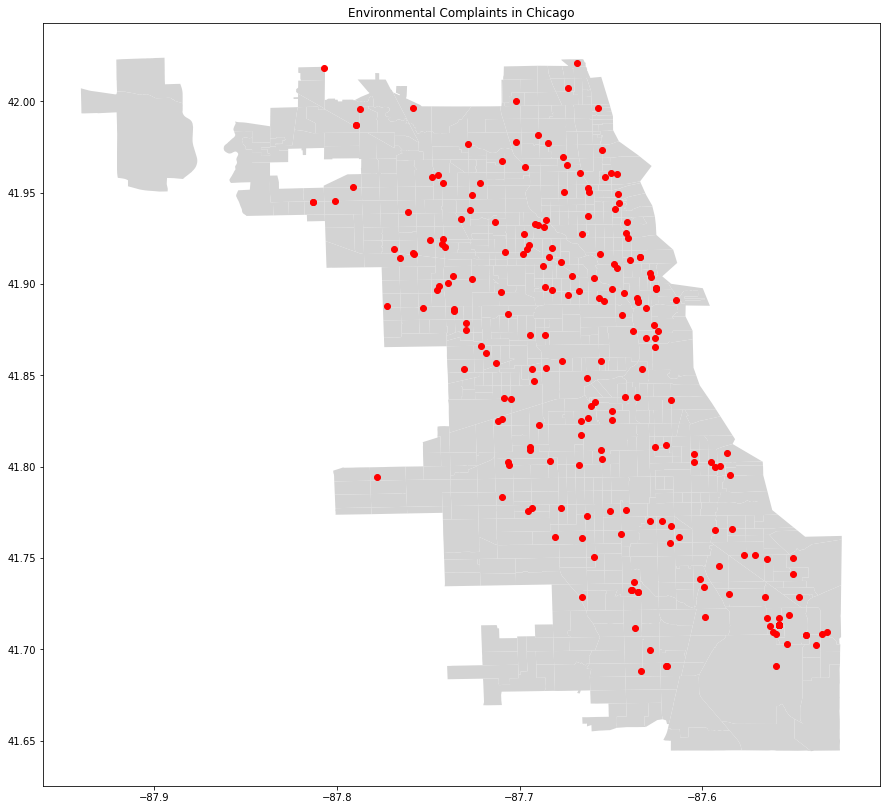

In [95]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
env_complaints_geo.plot(ax = ax, color = 'red')
ax.set_title('Environmental Complaints in Chicago')

## Grocery stores

In [96]:
grocery_store_api = 'https://data.cityofchicago.org/resource/3e26-zek2.json'
grocery_store = pd.read_json(grocery_store_api)

In [97]:
grocery_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   store_name                   264 non-null    object 
 1   address                      264 non-null    object 
 2   zip                          263 non-null    object 
 3   new_status                   264 non-null    object 
 4   last_updated                 255 non-null    object 
 5   location                     262 non-null    object 
 6   :@computed_region_rpca_8um6  256 non-null    float64
 7   :@computed_region_vrxf_vc4k  256 non-null    float64
 8   :@computed_region_6mkv_f3dw  262 non-null    float64
 9   :@computed_region_bdys_3d7i  257 non-null    float64
 10  :@computed_region_43wa_7qmu  256 non-null    float64
dtypes: float64(5), object(6)
memory usage: 22.8+ KB


In [98]:
grocery_store.describe()

,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,256.000000,256.000000,262.000000,257.000000,256.000000
mean,30.429688,37.609375,18849.175573,367.000000,25.351562
std,19.904353,19.985773,5845.477883,240.573647,14.515760
min,1.000000,1.000000,4299.000000,1.000000,1.000000
25%,13.000000,22.750000,14926.000000,138.000000,12.750000
50%,29.000000,33.000000,21554.000000,340.000000,25.000000
75%,50.000000,56.250000,22254.000000,580.000000,38.250000
max,61.000000,77.000000,22620.000000,801.000000,50.000000


In [99]:
grocery_store.isnull().sum()

store_name                     0
address                        0
zip                            1
new_status                     0
last_updated                   9
location                       2
:@computed_region_rpca_8um6    8
:@computed_region_vrxf_vc4k    8
:@computed_region_6mkv_f3dw    2
:@computed_region_bdys_3d7i    7
:@computed_region_43wa_7qmu    8
dtype: int64

In [100]:
grocery_store['location'][0]['coordinates'][0]

-87.626243

In [101]:
n_gs = grocery_store.shape[0]

lat_col = []
lon_col = []

for i in range(n_gs):
  location = grocery_store.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['coordinates'][1])
    lon_col.append(location['coordinates'][0])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [102]:
grocery_store['latitude'] = lat_col
grocery_store['longitude'] = lon_col

In [103]:
grocery_store_geo = gpd.GeoDataFrame(grocery_store, geometry = gpd.points_from_xy(grocery_store.longitude, grocery_store.latitude))

In [104]:
grocery_store_geo.tail()

,store_name,address,zip,new_status,last_updated,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,latitude,longitude,geometry
259,Fat Lee Supermarket,2707 S WELLS ST,60616,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.633033, ...",40.0,35.0,21194.0,346.0,48.0,41.843813,-87.633033,POINT (-87.63303 41.84381)
260,Aldi,6220 N California Ave,60659-2608,OPEN,2020-06-04T15:00:00.000,"{'type': 'Point', 'coordinates': [-87.699541, ...",50.0,20.0,4450.0,30.0,27.0,41.994349,-87.699541,POINT (-87.69954 41.99435)
261,Fair Share Finer Foods,6422 W 63rd Street,60638,OPEN,2020-06-04T15:00:00.000,"{'type': 'Point', 'coordinates': [-87.782075, ...",7.0,62.0,22268.0,335.0,15.0,41.777702,-87.782075,POINT (-87.78208 41.77770)
262,Avenue Food Mart,6850 W BELMONT AVE,60634,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.79769200...",52.0,17.0,22254.0,396.0,44.0,41.938134,-87.797692,POINT (-87.79769 41.93813)
263,Lindo Michoacan,3142 W LAWRENCE AVE,60625,OPEN,2020-06-10T00:00:00.000,"{'type': 'Point', 'coordinates': [-87.707908, ...",20.0,14.0,21849.0,749.0,20.0,41.968473,-87.707908,POINT (-87.70791 41.96847)


Text(0.5, 1.0, 'Grocery Stores in Chicago')

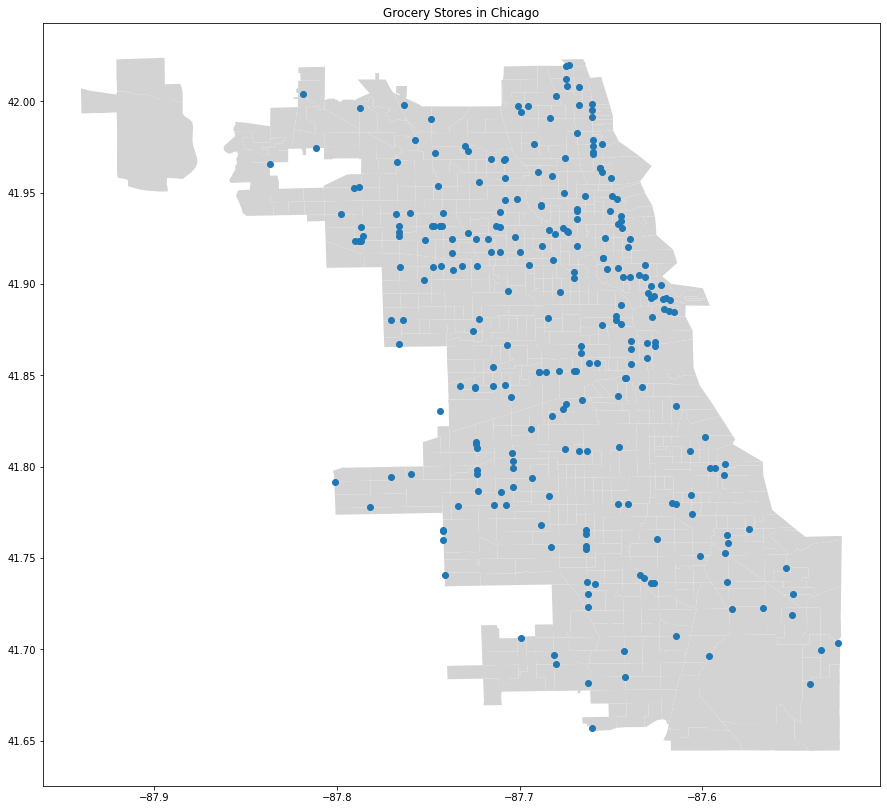

In [105]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
grocery_store_geo.plot(ax = ax)
ax.set_title('Grocery Stores in Chicago')

## Preschool programs

In [106]:
preschool_api = 'https://data.cityofchicago.org/resource/ck29-hb9r.json'
preschool = pd.read_json(preschool_api)

In [107]:
preschool.head()

,key,site_name,description,address,city,state,zip,phone_number,url,ages_served,ages_0_3,ages_3_5,weekday_availability,program_information,other_features,accreditation,quality,quality_rating,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,198,ABC Preschool,<p>We have seen that there is a need for stron...,3800 N Austin Ave,Chicago,IL,60634,(773) 685-9033,http://www.abcpreschoolchicago.com,2 years to 6 years,1.0,1.0,"Full Week, Part Week, Full Day, Half Day","Community Based, Head Start",Accepts CCAP,None,licensed,Licensed,41.949425,-87.776653,"{'latitude': '41.949425', 'longitude': '-87.77...",25.0,22254,17.0,443.0,19.0
1,200,Academy of St Benedict the African - Stewart,<p>Our preschool program serves children from ...,6547 S Stewart Ave,Chicago,IL,60621,(773) 994-6100,http://www.academystbenedictstewart.org,3 - 5,0.0,1.0,"Full Week, Full Day",Community Based,Accepts CCAP,"NAEYC, AdvanceEd candidate",licensed,Licensed,41.774735,-87.634413,"{'latitude': '41.774735', 'longitude': '-87.63...",53.0,21559,66.0,435.0,4.0
2,480,A Child's World,<p>Little Genius is located in the Roseland co...,2145 E 83rd St,Chicago,IL,60617,(773) 978-6598,http://adasmckinley.org,None,0.0,0.0,None,"Community Based, Head Start",Accepts CCAP,None,licensed,Licensed,41.744159,-87.571599,"{'latitude': '41.744159', 'longitude': '-87.57...",9.0,21202,42.0,507.0,37.0
3,999,Ada S. McKinley - Bunnyland Day Care,NaN,545 W 119th St,Chicago,IL,60628,(773) 568-5200,NaN,6 weeks to 5 years,1.0,1.0,None,Community Based,NaN,NAEYC,licensed,Licensed,41.677689,-87.636695,"{'latitude': '41.677688577398', 'longitude': '...",45.0,21861,50.0,60.0,22.0
4,205,Ada S. McKinley Community Services - Ersula Ho...,<p>Ersula Howard is located in the South shore...,7222 S Exchange Ave,Chicago,IL,60649,(773) 221-9711,http://www.adasmckinley.org,3 years to 5 years,0.0,1.0,"Full Week, Full Day","Offers Home Visiting, Community Based, Head Start",Accepts CCAP,COA,gold,Gold,41.763831,-87.564609,"{'latitude': '41.763831', 'longitude': '-87.56...",43.0,22538,39.0,417.0,37.0


In [108]:
preschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   key                          706 non-null    int64  
 1   site_name                    706 non-null    object 
 2   description                  609 non-null    object 
 3   address                      706 non-null    object 
 4   city                         706 non-null    object 
 5   state                        706 non-null    object 
 6   zip                          706 non-null    object 
 7   phone_number                 696 non-null    object 
 8   url                          634 non-null    object 
 9   ages_served                  706 non-null    object 
 10  ages_0_3                     679 non-null    float64
 11  ages_3_5                     705 non-null    float64
 12  weekday_availability         706 non-null    object 
 13  program_information 

In [109]:
preschool.describe()

,key,ages_0_3,ages_3_5,latitude,longitude,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,706.000000,679.000000,705.000000,706.000000,706.000000,705.000000,706.000000,705.000000,705.000000,705.000000
mean,630.712465,0.363770,0.944681,41.833046,-87.675371,26.685106,19240.706799,40.151773,382.507801,25.070922
std,233.760782,0.481438,0.228764,0.087865,0.057183,15.795483,5721.978310,20.497809,227.589325,15.071348
min,197.000000,0.000000,0.000000,41.652097,-87.834184,1.000000,4299.000000,1.000000,1.000000,1.000000
25%,435.750000,0.000000,1.000000,41.764310,-87.714008,12.000000,21190.000000,25.000000,186.000000,12.000000
50%,643.500000,0.000000,1.000000,41.830195,-87.674116,26.000000,21569.000000,36.000000,382.000000,26.000000
75%,826.750000,1.000000,1.000000,41.902806,-87.637063,41.000000,22248.000000,60.000000,575.000000,38.000000
max,1023.000000,1.000000,1.000000,42.021062,-87.528156,53.000000,26615.000000,77.000000,801.000000,50.000000


In [110]:
preschool.isnull().sum()

key                              0
site_name                        0
description                     97
address                          0
city                             0
state                            0
zip                              0
phone_number                    10
url                             72
ages_served                      0
ages_0_3                        27
ages_3_5                         1
weekday_availability             0
program_information              0
other_features                 465
accreditation                    0
quality                          0
quality_rating                   0
latitude                         0
longitude                        0
location                         0
:@computed_region_awaf_s7ux      1
:@computed_region_6mkv_f3dw      0
:@computed_region_vrxf_vc4k      1
:@computed_region_bdys_3d7i      1
:@computed_region_43wa_7qmu      1
dtype: int64

In [111]:
preschool_geo = gpd.GeoDataFrame(preschool, geometry = gpd.points_from_xy(preschool.longitude, preschool.latitude))

Text(0.5, 1.0, 'Preeschool programs in Chicago')

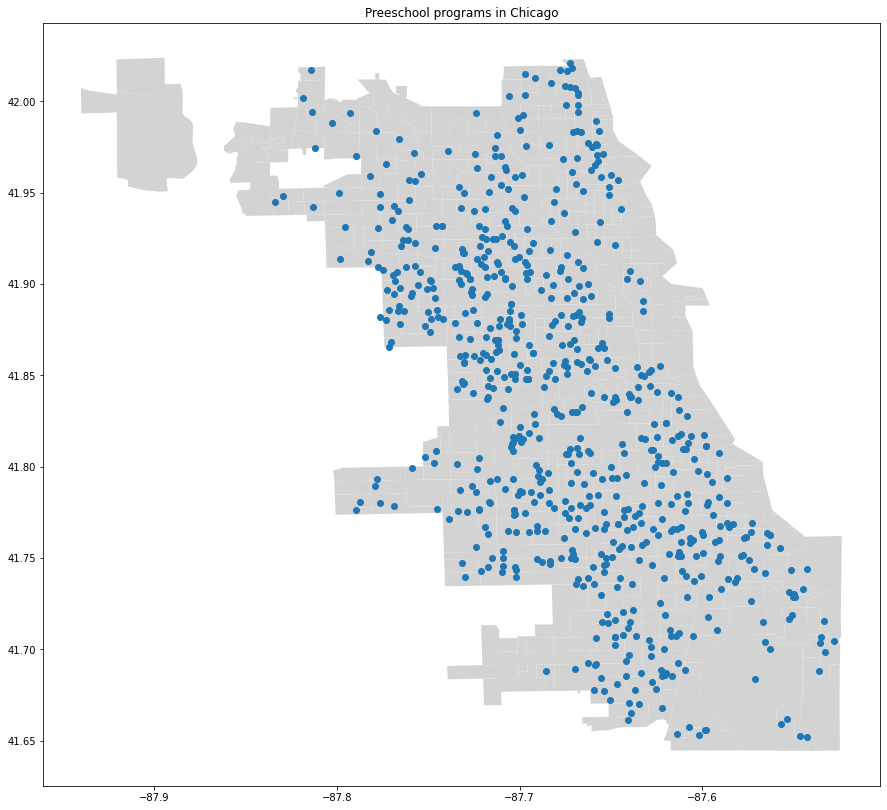

In [112]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
preschool_geo.plot(ax = ax)
ax.set_title('Preeschool programs in Chicago')

## After school programs

In [113]:
after_school_api = 'https://data.cityofchicago.org/resource/83yd-jxxw.json'
after_school = pd.read_json(after_school_api)

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning:

tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [114]:
after_school.head()

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,summary,administrator_title,administrator,secondary_contact_title,secondary_contact,address,city,state,zip,phone,fax,cps_school_profile,website,twitter,attendance_boundaries,grades_offered_all,grades_offered,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity,student_count_asian_pacific,student_count_multi,student_count_hawaiian_pacific,...,is_gocps_participant,is_gocps_prek,is_gocps_elementary,is_gocps_high_school,open_for_enrollment_date,school_latitude,school_longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,facebook,after_school_hours,earliest_drop_off_time,transportation_el,third_contact_title,third_contact_name,fourth_contact_title,fourth_contact_name,freshman_start_end_time,refugee_services,college_enrollment_rate_school,college_enrollment_rate_mean,graduation_rate_school,graduation_rate_mean,fifth_contact_title,fifth_contact_name,sixth_contact_title,sixth_contact_name,youtube,closed_for_enrollment_date,transportation_metra,hard_of_hearing,visual_impairments,seventh_contact_title,seventh_contact_name,significantly_modified,pinterest
0,609983,3900,23681,HEDGES,James Hedges Elementary School,ES,False,True,True,True,Hedges Fine and Performing Arts School is a co...,Principal,Carmen Medina,Assistant Principal,Debra Kearney,4747 S WINCHESTER AVE,Chicago,Illinois,60609,773-535-7360,773-535-4178,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://hedgescps.org'},{'url': 'http://twitter.com/hedgescps'},True,"PK,K,1,2,3,4,5,6,7,8","PK,K-8",480,404,73,309,9,464,7,0,0,0,0,0,0,...,True,False,1.0,False,2004-09-01T00:00:00.000,41.807112,-87.673327,"{'type': 'Point', 'coordinates': [-87.673327, ...",37,59,14924,709,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610201,6190,29301,THORP O,Ole A Thorp Elementary Scholastic Academy,ES,False,True,True,False,Thorp Scholastic Academy is a national exempla...,Principal,Efren D Toledo,Assistant Principal,Madonna Arredondo,6024 W WARWICK AVE,Chicago,Illinois,60634,773-534-3640,773-534-3639,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://oathorpacademy.org'},{'url': 'https://twitter.com/ThorpSchool'},False,"K,1,2,3,4,5,6,7,8",K-8,805,270,134,72,57,442,251,28,2,0,0,18,5,...,True,False,1.0,False,2004-09-01T00:00:00.000,41.948571,-87.777631,"{'type': 'Point', 'coordinates': [-87.777631, ...",52,17,22254,443,19,{'url': 'https://www.facebook.com/oathorp'},Paid After-care 6:30 PM,7:00 AM,Blue,Assistant Principal,Elaine McFarlane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400172,9647,66255,ASPIRA - BUSINESS & FINANCE HS,ASPIRA Business and Finance,HS,True,False,False,False,The ASPIRA Business and Finance High School is...,Director,Raul De Jesus Guerra,Assistant Principal,Jordana Kafka,2989 N MILWAUKEE AVE,Chicago,Illinois,60618,773-243-1820,773-243-1820,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://abfhs.aspirail.org'},{'url': 'https://twitter.com/ASPIRABusiness'},False,"9,10,11,12",9-12,446,351,109,176,14,418,8,0,1,0,0,2,3,...,True,False,0.0,True,2015-07-01T00:00:00.000,41.935726,-87.718204,"{'type': 'Point', 'coordinates': [-87.718204, ...",39,22,21538,215,21,{'url': 'https://www.facebook.com/ASPIRABusine...,3:15PM-4:30PM,7:30AM,Blue,Dean of Students,Terrense Kyles,Joselyn Salgado,Registrar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,610547,8676,46631,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,HS,True,False,False,False,"At South Shore International Colle

In [115]:
n_after_school = after_school.shape[0]

lat_col = []
lon_col = []

for i in range(n_after_school):
  location = after_school.location[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['coordinates'][1])
    lon_col.append(location['coordinates'][0])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [116]:
after_school['latitude'] = lat_col
after_school['longitude'] = lon_col

In [117]:
after_school_geo = gpd.GeoDataFrame(after_school, geometry = gpd.points_from_xy(after_school.longitude, after_school.latitude))

Text(0.5, 1.0, 'After school programs in Chicago')

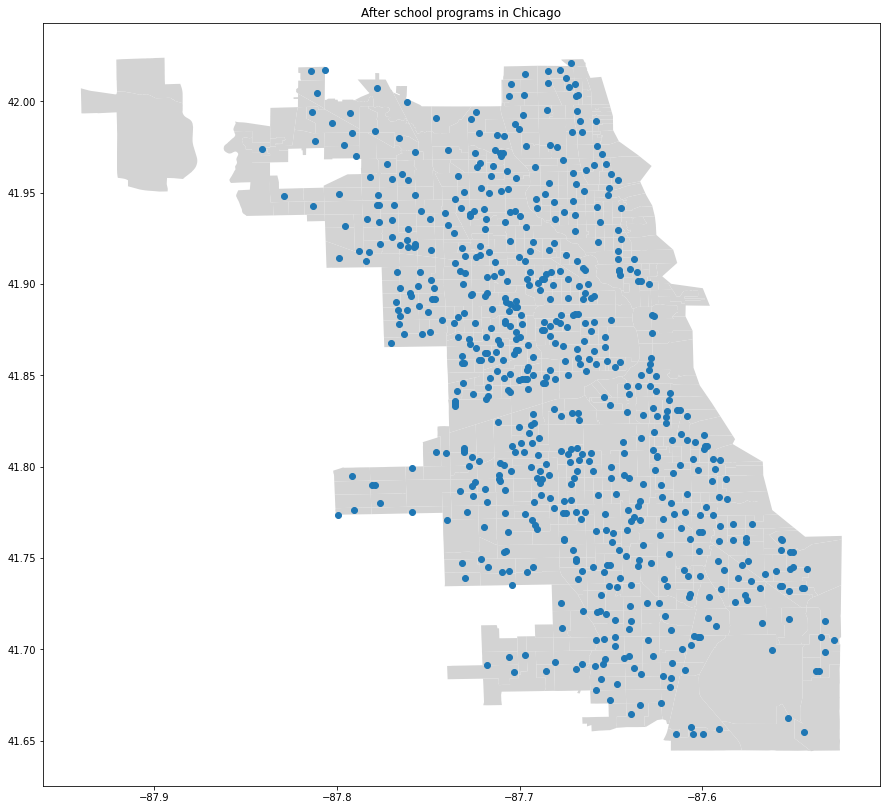

In [118]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
after_school_geo.plot(ax = ax)
ax.set_title('After school programs in Chicago')

## Vacant and abandoned buildings

In [119]:
s311_api = 'https://data.cityofchicago.org/resource/v6vf-nfxy.json'
s311 = pd.read_json(s311_api)

In [120]:
s311.head()

,sr_number,sr_type,sr_short_code,owner_department,status,created_date,last_modified_date,closed_date,street_address,city,state,zip_code,street_number,street_direction,street_name,street_type,duplicate,legacy_record,created_hour,created_day_of_week,created_month,parent_sr_number,community_area,ward,electricity_grid,police_sector,police_district,police_beat,precinct,x_coordinate,y_coordinate,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,SR21-01613976,Aircraft Noise Complaint,AVN,Aviation,Completed,2021-09-09T20:15:10.000,2021-09-09T20:15:10.000,2021-09-09T20:15:10.000,10510 W ZEMKE RD,Chicago,IL,60666.0,10510,W,ZEMKE,RD,False,False,20,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SR21-01613975,311 INFORMATION ONLY CALL,311IOC,311 City Services,Completed,2021-09-09T20:15:05.000,2021-09-09T20:15:06.000,2021-09-09T20:15:06.000,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,20,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SR21-01613974,Street Light Out Complaint,SFD,CDOT - Department of Transportation,Open,2021-09-09T20:14:46.000,2021-09-09T20:14:47.000,NaN,3800 W 109TH ST,NaN,NaN,60655.0,3800,W,109TH,ST,True,False,20,5,9,SR21-01605801,74.0,19.0,G048,1.0,22.0,2211.0,16.0,1.152928e+06,1.832041e+06,41.694971,-87.715714,"{'latitude': '41.69497137594582', 'longitude':...",33.0,73.0,4447.0,369.0,42.0
3,SR21-01613973,Aircraft Noise Complaint,AVN,Aviation,Completed,2021-09-09T20:14:35.000,2021-09-09T20:14:37.000,2021-09-09T20:14:37.000,10510 W ZEMKE RD,Chicago,IL,60666.0,10510,W,ZEMKE,RD,False,False,20,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SR21-01613972,Alley Light Out Complaint,SFA,CDOT - Department of Transportation,Open,2021-09-09T20:14:24.000,2021-09-09T20:14:25.000,NaN,7036 S MAPLEWOOD AVE,NaN,NaN,60629.0,7036,S,MAPLEWOOD,AVE,True,False,20,5,9,SR21-01563196,66.0,17.0,J038,3.0,8.0,832.0,3.0,1.160520e+06,1.857742e+06,41.765347,-87.687212,"{'latitude': '41.7653465775129', 'longitude': ...",58.0,64.0,21867.0,383.0,31.0


In [121]:
s311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sr_number                    1000 non-null   object 
 1   sr_type                      1000 non-null   object 
 2   sr_short_code                1000 non-null   object 
 3   owner_department             1000 non-null   object 
 4   status                       1000 non-null   object 
 5   created_date                 1000 non-null   object 
 6   last_modified_date           1000 non-null   object 
 7   closed_date                  613 non-null    object 
 8   street_address               1000 non-null   object 
 9   city                         574 non-null    object 
 10  state                        574 non-null    object 
 11  zip_code                     998 non-null    float64
 12  street_number                1000 non-null   int64  
 13  street_direction   

In [122]:
s311.describe()

,zip_code,street_number,created_hour,created_day_of_week,created_month,community_area,ward,police_sector,police_district,police_beat,precinct,x_coordinate,y_coordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,998.000000,1000.000000,1000.000000,1000.0,1000.0,895.000000,895.000000,894.000000,894.000000,894.000000,894.000000,8.960000e+02,8.960000e+02,895.000000,895.000000,894.000000,894.000000,895.000000,894.000000,894.000000
mean,60637.019038,5943.142000,17.812000,5.0,9.0,47.414525,29.217877,2.806488,12.468680,1278.436242,27.871365,1.147549e+06,1.901192e+06,41.884689,-87.733704,32.204698,47.338926,19214.379888,380.934004,26.033557
std,23.738221,3965.488691,1.190829,0.0,0.0,23.840428,12.409066,1.485851,5.156957,521.884113,13.690148,2.839973e+04,3.579918e+04,0.098667,0.103649,14.210682,22.860214,4004.878713,277.946181,10.217182
min,60601.000000,9.000000,16.000000,5.0,9.0,1.000000,1.000000,1.000000,1.000000,114.000000,1.000000,1.105376e+06,1.814862e+06,41.647240,-87.887752,1.000000,3.000000,4299.000000,5.000000,1.000000
25%,60612.000000,2111.000000,17.000000,5.0,9.0,28.000000,21.000000,2.000000,9.000000,921.000000,17.000000,1.105376e+06,1.874710e+06,41.811615,-87.887752,24.000000,29.000000,16197.000000,48.750000,23.000000
50%,60632.000000,5231.000000,18.000000,5.0,9.0,45.000000,28.000000,2.000000,12.000000,1225.000000,27.000000,1.162234e+06,1.896560e+06,41.871831,-87.679846,28.000000,45.000000,21184.000000,457.000000,29.000000
75%,60666.000000,10510.000000,19.000000,5.0,9.0,76.000000,41.000000,5.000000,16.000000,1654.000000,45.000000,1.166416e+06,1.941043e+06,41.994897,-87.663860,38.000000,75.000000,21861.000000,668.000000,29.000000
max,60827.000000,12425.000000,20.000000,5.0,9.0,77.000000,50.000000,5.000000,25.000000,2535.000000,57.000000,1.201422e+06,1.949055e+06,42.015814,-87.537944,61.000000,77.000000,22620.000000,799.000000,50.000000


In [123]:
s311.isnull().sum()

sr_number                        0
sr_type                          0
sr_short_code                    0
owner_department                 0
status                           0
created_date                     0
last_modified_date               0
closed_date                    387
street_address                   0
city                           426
state                          426
zip_code                         2
street_number                    0
street_direction                 0
street_name                      0
street_type                      2
duplicate                        0
legacy_record                    0
created_hour                     0
created_day_of_week              0
created_month                    0
parent_sr_number               928
community_area                 105
ward                           105
electricity_grid               353
police_sector                  106
police_district                106
police_beat                    106
precinct            

In [124]:
s311_geo = gpd.GeoDataFrame(s311, geometry = gpd.points_from_xy(s311.longitude, s311.latitude))

Text(0.5, 1.0, 'Vacant and abandoned buildings in Chicago')

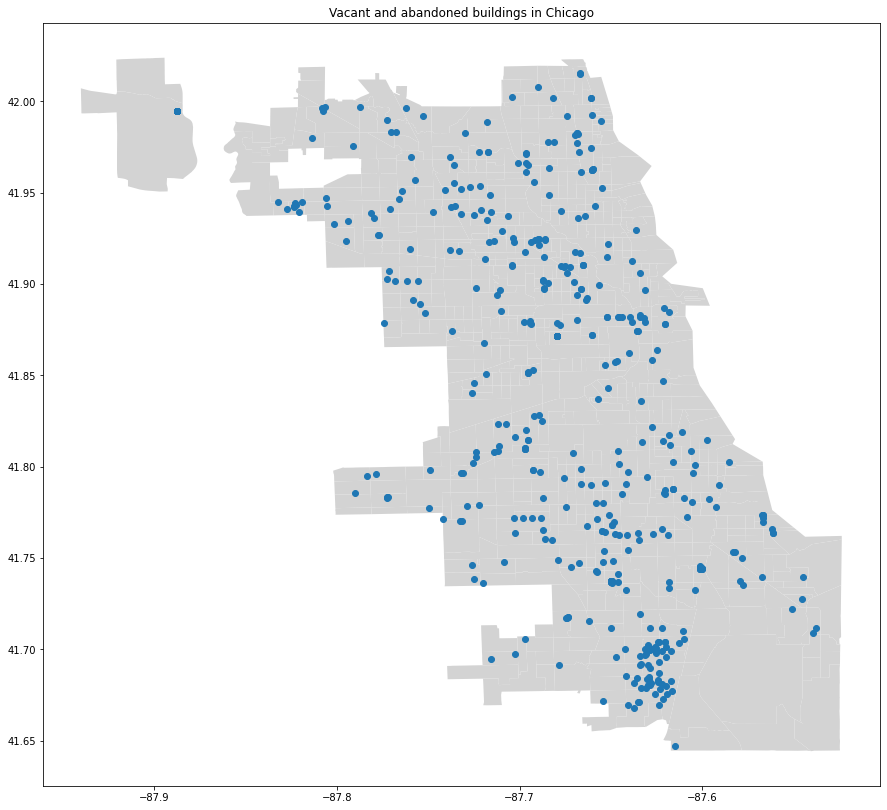

In [125]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
s311_geo.plot(ax = ax)
ax.set_title('Vacant and abandoned buildings in Chicago')

## WIC clinics

In [126]:
wic_api = 'https://data.cityofchicago.org/resource/a7k7-a5bg.json'
wic = pd.read_json(wic_api)

In [127]:
wic.head()

,:@computed_region_43wa_7qmu,wic,location,city,hours_of_operation,site_name,state,latitude,:@computed_region_awaf_s7ux,clinic_type,phone_2,zip,street_address,phone_1,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,fax,site_number,:@computed_region_vrxf_vc4k,family_case_management,healthy_families_program,phone_3,phone_5,public_health_nursing,phone_4,healthy_start_program
0,26,Y,"{'latitude': '41.848583', 'needs_recoding': Fa...",Chicago,"Mon, Tues, Thurs & Fri: 8:00 a.m. - 4:30 p.m.;...",Alivio Medical Center,IL,41.848583,8,WIC Clinic,773-650-1205,60608,2355 S. Western Ave.,773-843-4220,-87.685394,204,14920,773-650-1232,106.0,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,Y,"{'latitude': '41.85415', 'needs_recoding': Fal...",Chicago,Mon - Fri: 8:30 a.m. – 2:00 p.m.,Alivio Medical Center - Morgan,IL,41.854150,8,WIC Clinic,NaN,60608,966 W. 21st St.,312-829-6838,-87.653223,251,14920,312-949-7625,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Y,"{'latitude': '41.990601', 'needs_recoding': Fa...",Chicago,"Mon, Wed, Thurs & Fri: 9:00 a.m. - 5:00 p.m.; ...","Asian Human Services Family Health Center, Inc.",IL,41.990601,46,WIC Clinic,773-564-8114,60659,2424 W. Peterson Ave.,773-761-2324,-87.690739,31,4450,773-761-0009,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,Y,"{'latitude': '41.902212', 'needs_recoding': Fa...",Chicago,Mon - Fri: 8:00 a.m. - 4:00 p.m.,Austin Clinic,IL,41.902212,4,WIC Clinic,312-746-4796,60651,4909 W. Division St.,312-746-4797,-87.748845,585,4299,312-746-4799,19.0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,Y,"{'latitude': '41.729457', 'needs_recoding': Fa...",Chicago,Mon - Fri: 8:00 a.m. - 4:00 p.m.,Chicago Family Health Center,IL,41.729457,47,WIC Clinic,NaN,60617,9119 S. Exchange Ave.,"773-768-0373 ext. 1180, 1181, 1182",-87.552478,510,21202,773-768-5264,33.0,42,Y,Y,NaN,NaN,NaN,NaN,NaN


In [128]:
wic.describe()

,:@computed_region_43wa_7qmu,latitude,:@computed_region_awaf_s7ux,zip,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,site_number,:@computed_region_vrxf_vc4k
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,11.000000,15.000000
mean,25.733333,41.858797,28.133333,60622.266667,-87.662608,347.333333,17541.400000,42.545455,31.533333
std,16.542010,0.068718,18.062853,16.477113,0.049364,207.144762,6134.841025,44.493513,16.672761
min,1.000000,41.729457,4.000000,60604.000000,-87.748845,20.000000,4299.000000,1.000000,1.000000
25%,9.500000,41.818384,9.000000,60609.000000,-87.689259,227.500000,14920.000000,14.500000,25.000000
50%,26.000000,41.854150,32.000000,60617.000000,-87.666013,302.000000,21194.000000,23.000000,32.000000
75%,40.000000,41.898609,46.500000,60627.500000,-87.634471,475.000000,21560.000000,68.000000,35.500000
max,49.000000,41.990601,53.000000,60659.000000,-87.552478,793.000000,22616.000000,121.000000,66.000000


In [129]:
wic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   :@computed_region_43wa_7qmu  15 non-null     int64  
 1   wic                          15 non-null     object 
 2   location                     15 non-null     object 
 3   city                         15 non-null     object 
 4   hours_of_operation           15 non-null     object 
 5   site_name                    15 non-null     object 
 6   state                        15 non-null     object 
 7   latitude                     15 non-null     float64
 8   :@computed_region_awaf_s7ux  15 non-null     int64  
 9   clinic_type                  15 non-null     object 
 10  phone_2                      12 non-null     object 
 11  zip                          15 non-null     int64  
 12  street_address               15 non-null     object 
 13  phone_1               

In [130]:
wic.isnull().sum()

:@computed_region_43wa_7qmu     0
wic                             0
location                        0
city                            0
hours_of_operation              0
site_name                       0
state                           0
latitude                        0
:@computed_region_awaf_s7ux     0
clinic_type                     0
phone_2                         3
zip                             0
street_address                  0
phone_1                         0
longitude                       0
:@computed_region_bdys_3d7i     0
:@computed_region_6mkv_f3dw     0
fax                             0
site_number                     4
:@computed_region_vrxf_vc4k     0
family_case_management         10
healthy_families_program       14
phone_3                         8
phone_5                        12
public_health_nursing          13
phone_4                        11
healthy_start_program          14
dtype: int64

In [131]:
wic_geo = gpd.GeoDataFrame(wic, geometry = gpd.points_from_xy(wic.longitude, wic.latitude))

Text(0.5, 1.0, 'WIC clinics in Chicago')

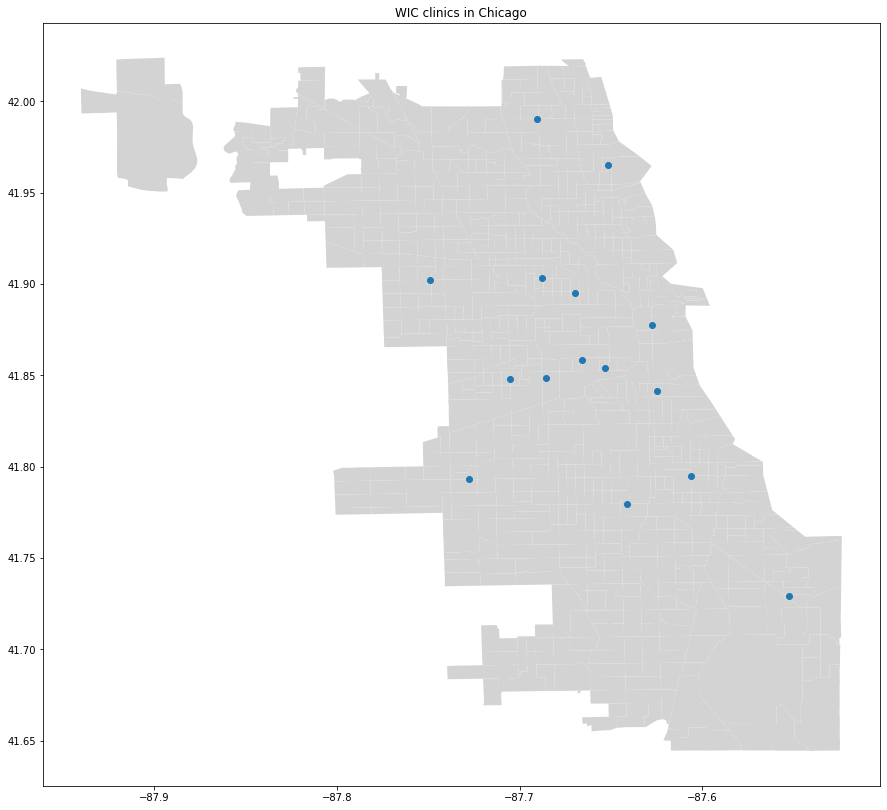

In [132]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
wic_geo.plot(ax = ax)
ax.set_title('WIC clinics in Chicago')

## Primary care clinics

In [133]:
pcc_api = 'https://data.cityofchicago.org/resource/cjg8-dbka.json'
pcc = pd.read_json(pcc_api)

In [134]:
pcc.head()

,facility,community_area,phone,fqhc_look_alike_or_neither_special_notes,location_1,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
0,Mercy Family Health Center @ Oakwood Shores,OAKLAND (36),(773) 451-0460,Look-alike,"{'latitude': '41.826722480000456', 'longitude'...",36.0,2.0,4301,221.0,10.0,1.0
1,ACCESS Southwest Family Health Center,GARFIELD RIDGE (56),(866) 882-2237,FQHC,"{'latitude': '41.80757461200045', 'longitude':...",7.0,53.0,22268,605.0,28.0,35.0
2,Heartland Health Outreach- Refugee Health,UPTOWN (3),(773) 751-1744,FQHC; specialize in refugee health,"{'latitude': '41.96843068300046', 'longitude':...",15.0,31.0,22616,241.0,39.0,37.0
3,Heartland Health Center- Hibbard Elementary Sc...,ALBANY PARK (14),(773) 336-6100,FQHC; School-based health center (open to comm...,"{'latitude': '41.97084703000047', 'longitude':...",20.0,14.0,21849,750.0,20.0,28.0
4,Near North - Winfield Moody Health Center,NEAR NORTH SIDE (8),(312) 337-1073,FQHC,"{'latitude': '41.90535451700049', 'longitude':...",54.0,37.0,14926,309.0,46.0,41.0


In [135]:
n_pcc = pcc.shape[0]

In [136]:
lat_col = []
lon_col = []
for i in range(n_pcc):
  location = pcc.location_1[i]
  try:
    #print(location['latitude'])
    lat_col.append(location['latitude'])
    lon_col.append(location['longitude'])
  except:
    lat_col.append(np.nan)
    lon_col.append(np.nan)

In [137]:
pcc['latitude'] = lat_col
pcc['longitude'] = lon_col

In [138]:
pcc.describe()

,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
count,119.000000,119.000000,120.000000,119.000000,119.000000,119.000000
mean,30.453782,33.798319,18708.675000,364.504202,24.008403,25.352941
std,19.533000,19.597466,5680.408877,218.957541,16.274393,16.165766
min,1.000000,1.000000,3906.000000,2.000000,1.000000,1.000000
25%,11.500000,24.000000,14924.000000,195.000000,9.000000,11.500000
50%,32.000000,31.000000,21560.000000,341.000000,23.000000,24.000000
75%,43.000000,50.500000,21867.000000,545.500000,41.000000,39.000000
max,61.000000,76.000000,22616.000000,790.000000,49.000000,53.000000


In [139]:
pcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   facility                                  120 non-null    object 
 1   community_area                            120 non-null    object 
 2   phone                                     120 non-null    object 
 3   fqhc_look_alike_or_neither_special_notes  120 non-null    object 
 4   location_1                                120 non-null    object 
 5   :@computed_region_rpca_8um6               119 non-null    float64
 6   :@computed_region_vrxf_vc4k               119 non-null    float64
 7   :@computed_region_6mkv_f3dw               120 non-null    int64  
 8   :@computed_region_bdys_3d7i               119 non-null    float64
 9   :@computed_region_43wa_7qmu               119 non-null    float64
 10  :@computed_region_awaf_s7ux           

In [140]:
pcc.isnull().sum()

facility                                    0
community_area                              0
phone                                       0
fqhc_look_alike_or_neither_special_notes    0
location_1                                  0
:@computed_region_rpca_8um6                 1
:@computed_region_vrxf_vc4k                 1
:@computed_region_6mkv_f3dw                 0
:@computed_region_bdys_3d7i                 1
:@computed_region_43wa_7qmu                 1
:@computed_region_awaf_s7ux                 1
latitude                                    0
longitude                                   0
dtype: int64

In [141]:
pcc_geo = gpd.GeoDataFrame(pcc, geometry = gpd.points_from_xy(pcc.longitude, pcc.latitude))

Text(0.5, 1.0, 'Primary care clinics in Chicago')

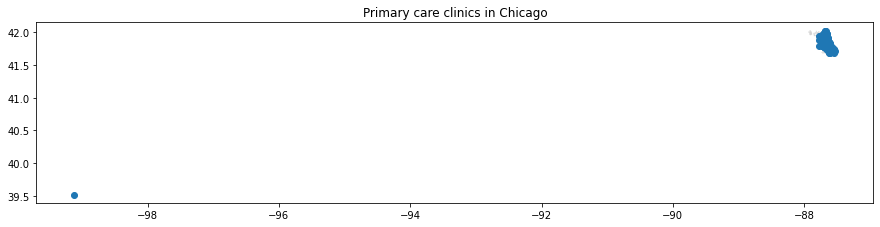

In [142]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
pcc_geo.plot(ax = ax)
ax.set_title('Primary care clinics in Chicago')

## Asbestos and demolition notification

In [143]:
asbestos_api = 'https://data.cityofchicago.org/resource/qhb4-qx8k.json'
asbestos = pd.read_json(asbestos_api)

In [144]:
asbestos.head()

,notification_type,address,street_number,direction,street_name,street_type,notification_from,start_date,end_date,data_source,modified_date,comment,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,street_number_to
0,NOI DEMO/RENOVATION,1 W IRVING PARK RD,1,W,IRVING PARK,RD,PUBLIC BLDG. COMM. OF CHICAGO,2000-06-09T00:00:00.000,2000-06-19T00:00:00.000,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NOI DEMO/RENOVATION,1000 W WASHINGTON ST,1000,W,WASHINGTON,ST,"1000 WEST WASHINGTON LOFTS, LCC",1995-03-13T00:00:00.000,1995-05-22T00:00:00.000,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,DOWN AND COMPLETED.,41.883172,-87.652133,"{'type': 'Point', 'coordinates': [-87.65213310...",44.0,29.0,14917.0,63.0,46.0,41.0,NaN
2,NOI DEMO/RENOVATION,1012 W DIVERSEY AVE,1012,W,DIVERSEY,AVE,1012 W DIVERSEY L.L.C.,1998-11-11T00:00:00.000,NaN,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,41.932737,-87.654406,"{'type': 'Point', 'coordinates': [-87.65440602...",22.0,57.0,21190.0,680.0,25.0,38.0,NaN
3,NOI DEMO/RENOVATION,10245 S LA SALLE ST,10245,S,LA SALLE,ST,CITY OF CHICAGO,2002-08-29T00:00:00.000,2002-09-27T00:00:00.000,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,41.707608,-87.626984,"{'type': 'Point', 'coordinates': [-87.62698364...",19.0,45.0,21861.0,569.0,43.0,30.0,NaN
4,NOI DEMO/RENOVATION,1035 W 115TH PL,1035,W,115TH,PL,CITY OF CHICAGO,2009-07-01T00:00:00.000,NaN,HISTORIC DEPT. OF ENVIRONMENT,2012-01-01T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
asbestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   notification_type            999 non-null    object 
 1   address                      1000 non-null   object 
 2   street_number                1000 non-null   int64  
 3   direction                    1000 non-null   object 
 4   street_name                  1000 non-null   object 
 5   street_type                  995 non-null    object 
 6   notification_from            992 non-null    object 
 7   start_date                   1000 non-null   object 
 8   end_date                     520 non-null    object 
 9   data_source                  1000 non-null   object 
 10  modified_date                1000 non-null   object 
 11  comment                      551 non-null    object 
 12  latitude                     967 non-null    float64
 13  longitude          

In [146]:
asbestos.describe()

,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,street_number_to
count,1000.000000,967.000000,967.000000,963.000000,963.000000,967.000000,967.000000,963.000000,963.000000,78.000000
mean,3333.294000,41.850416,-87.662446,28.632399,42.473520,18187.325750,395.641158,29.784008,28.780893,2587.179487
std,3567.683838,0.092930,0.048209,18.362086,18.321853,6192.931032,233.776876,13.495401,14.270580,2700.594133
min,1.000000,41.649008,-87.914428,1.000000,1.000000,4299.000000,1.000000,1.000000,1.000000,20.000000
25%,1224.000000,41.766304,-87.677640,16.000000,26.000000,14924.000000,186.500000,18.000000,16.000000,1109.250000
50%,1705.000000,41.883085,-87.661947,23.000000,40.000000,21546.000000,390.000000,33.000000,30.000000,1620.500000
75%,4234.750000,41.915487,-87.638332,44.000000,57.000000,21861.000000,595.000000,41.000000,41.000000,2095.000000
max,13535.000000,42.019484,-87.525914,61.000000,77.000000,22620.000000,800.000000,49.000000,53.000000,12009.000000


In [147]:
asbestos.isnull().sum()

notification_type                1
address                          0
street_number                    0
direction                        0
street_name                      0
street_type                      5
notification_from                8
start_date                       0
end_date                       480
data_source                      0
modified_date                    0
comment                        449
latitude                        33
longitude                       33
location                        33
:@computed_region_rpca_8um6     37
:@computed_region_vrxf_vc4k     37
:@computed_region_6mkv_f3dw     33
:@computed_region_bdys_3d7i     33
:@computed_region_43wa_7qmu     37
:@computed_region_awaf_s7ux     37
street_number_to               922
dtype: int64

In [148]:
asbestos_geo = gpd.GeoDataFrame(asbestos, geometry = gpd.points_from_xy(asbestos.longitude, asbestos.latitude))

Text(0.5, 1.0, 'Asbestos and demolition notification in Chicago')

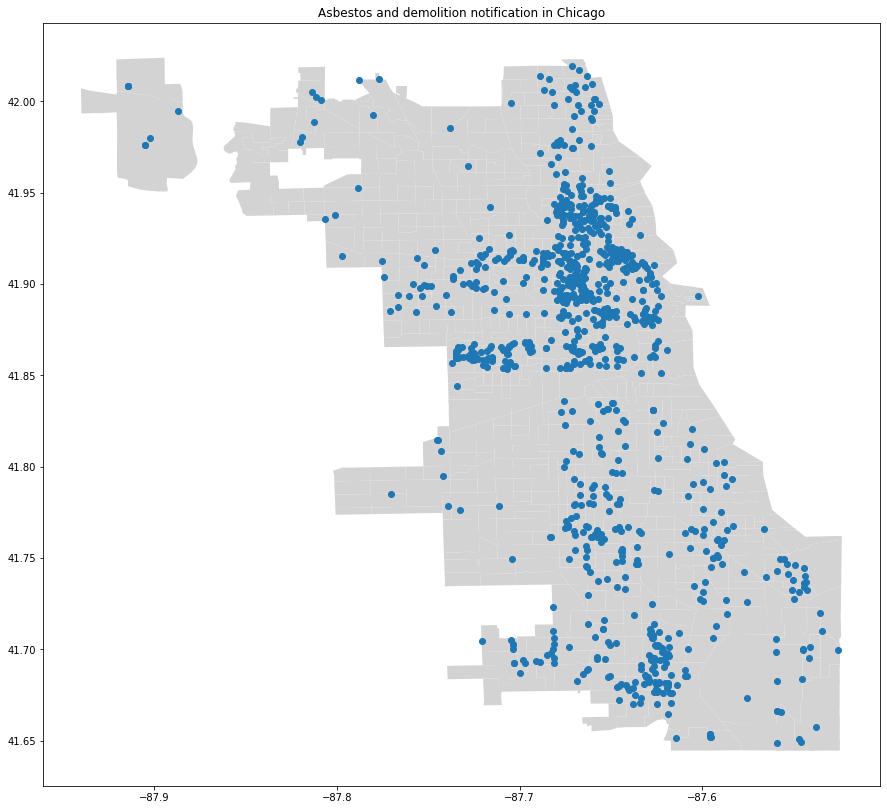

In [149]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
asbestos_geo.plot(ax = ax)
ax.set_title('Asbestos and demolition notification in Chicago')

##Bus routes

In [150]:
kmz = ZipFile('CTA_BusRoutes.kmz', 'r')
kmz.extract('doc.kml')
bus_route = gpd.read_file('doc.kml')

In [151]:
bus_route.head()

,Name,Description,geometry
0,54B,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",MULTILINESTRING Z ((-87.74192 41.76434 0.00000...
1,4,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",MULTILINESTRING Z ((-87.60987 41.69279 0.00000...
2,115,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",MULTILINESTRING Z ((-87.66079 41.68484 0.00000...
3,34,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",MULTILINESTRING Z ((-87.60514 41.65732 0.00000...
4,192,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",MULTILINESTRING Z ((-87.63970 41.88188 0.00000...


## Public health metrics

In [152]:
public_health_metrics_api = 'https://data.cityofchicago.org/resource/iqnk-2tcu.json'
public_health = pd.read_json(public_health_metrics_api)

In [153]:
public_health.head()

,community_area,community_area_name,birth_rate,general_fertility_rate,low_birth_weight,prenatal_care_beginning_in_first_trimester,preterm_births,teen_birth_rate,assault_homicide,breast_cancer_in_females,cancer_all_sites,colorectal_cancer,diabetes_related,firearm_related,infant_mortality_rate,lung_cancer,prostate_cancer_in_males,stroke_cerebrovascular_disease,childhood_blood_lead_level_screening,childhood_lead_poisoning,gonorrhea_in_females,gonorrhea_in_males,tuberculosis,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,60.5,3.7,5.1,36.0,14.2,34.7,331.4,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,80.0,4.6,6.5,50.5,25.2,41.7,353.7,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,55.4,6.1,3.8,43.1,27.6,36.9,273.3,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,49.8,1.0,2.7,42.4,15.1,41.6,178.1,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


## Merging


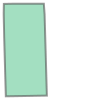

In [154]:
blocks.the_geom[0]

In [155]:
joined_data = gpd.sjoin(blocks_geo,parks_geo, how = 'left', op= 'contains')
joined_data = joined_data.drop(['index_right'], axis = 1)
joined_data.tail()

,the_geom,statefp10,countyfp10,tractce10,blockce10,geoid10,name10,tract_bloc,park_name,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,park_class,alfred_caldwell_lily_pond,location,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,...,handball_raquetball_court,horseshoe_courts,boat_launch_motorized,ice_skating,ward,model_yacht_basin,zip,tennis_courts,beach,street_address,golf_course,chess_pavillion,spray_feature,golf_course_miniature,basketball_courts,handball,zoo,football_soccer_combo,water_slide,senior_center,:@computed_region_bdys_3d7i,mountain_bike_trail,:@computed_region_6mkv_f3dw,park_number,dog_friendly,playground_park,artificial_turf_fields,boxing_center,playground,label,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet,latitude,longitude
995,"POLYGON ((-87.69149 41.92442, -87.68993 41.924...",17,31,221500,2006,170312215002006,Block 2006,2215002006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,"POLYGON ((-87.68874 41.92205, -87.68875 41.922...",17,31,221500,1012,170312215001012,Block 1012,2215001012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,"POLYGON ((-87.68841 41.92123, -87.68870 41.921...",17,31,221500,1015,170312215001015,Block 1015,2215001015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,"POLYGON ((-87.68982 41.92080, -87.69032 41.920...",17,31,221500,2027,170312215002027,Block 2027,2215002027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,"POLYGON ((-87.68860 41.91997, -87.68869 41.919...",17,31,221500,1014,170312215001014,Block 1014,2215001014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
joined_data = gpd.sjoin(joined_data,energy_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [157]:
joined_data = gpd.sjoin(joined_data,crime_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [158]:
joined_data = gpd.sjoin(joined_data,traffic_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [159]:
joined_data = gpd.sjoin(joined_data,air_quality_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [160]:
joined_data = gpd.sjoin(joined_data,building_permit_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [161]:
joined_data = gpd.sjoin(joined_data,beach_weather_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [162]:
joined_data = gpd.sjoin(joined_data,graffiti_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [163]:
joined_data = gpd.sjoin(joined_data,flu_shot_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [164]:
joined_data = gpd.sjoin(joined_data,env_insp_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [165]:
joined_data = gpd.sjoin(joined_data,grocery_store_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [166]:
joined_data = gpd.sjoin(joined_data,preschool_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [167]:
joined_data = gpd.sjoin(joined_data,after_school_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [168]:
joined_data = gpd.sjoin(joined_data,asbestos_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [169]:
joined_data = gpd.sjoin(joined_data,wic_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [170]:
joined_data = gpd.sjoin(joined_data,pcc_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [171]:
joined_data = gpd.sjoin(joined_data,s311_geo,how = 'left', op='contains')
joined_data = joined_data.drop(['index_right'], axis = 1)

In [172]:
joined_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1302 entries, 0 to 999
Columns: 611 entries, the_geom to :@computed_region_43wa_7qmu_right
dtypes: datetime64[ns](3), float64(298), geometry(1), int64(6), object(303)
memory usage: 6.1+ MB


In [173]:
joined_data.describe()

,statefp10,countyfp10,tractce10,blockce10,geoid10,tract_bloc,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu_left,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,alfred_caldwell_lily_pond,lagoon,casting_area,nature_center,sport_roller_courts,baseball_jr_softball_t_ball,baseball_sr,baseball_batting_cages,sled_hill,wetland_area,fitness_center,bocce_court,pool_indoor,cultural_center,carousel,water_playground,community_garden,gymnasium,golf_putting_greens,skate_park,acres,gallery,cricket_field,model_train_display,boat_launch_non_motorized,rowing_club,pool_outdoor,...,:@computed_region_6mkv_f3dw_left,:@computed_region_bdys_3d7i_left,:@computed_region_43wa_7qmu_left,:@computed_region_awaf_s7ux_right,street_number_to,:@computed_region_43wa_7qmu_right,latitude_left,:@computed_region_awaf_s7ux_left,zip,longitude_left,:@computed_region_bdys_3d7i_right,:@computed_region_6mkv_f3dw_right,site_number,:@computed_region_vrxf_vc4k_right,:@computed_region_rpca_8um6_right,:@computed_region_vrxf_vc4k_left,:@computed_region_6mkv_f3dw_left,:@computed_region_bdys_3d7i_left,:@computed_region_43wa_7qmu_left,:@computed_region_awaf_s7ux_right,zip_code,street_number,created_hour,created_day_of_week,created_month,community_area,ward,police_sector,police_district_right,police_beat,precinct,x_coordinate,y_coordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k_right,:@computed_region_6mkv_f3dw_right,:@computed_region_bdys_3d7i_right,:@computed_region_43wa_7qmu_right
count,1302.0,1302.0,1302.000000,1302.000000,1.302000e+03,1.302000e+03,12.0,12.0,12.000000,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.00000,12.000000,12.0,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.0,12.0,12.0,12.0,12.0,12.000000,...,302.000000,302.000000,302.000000,302.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,256.000000,256.000000,256.000000,256.0,256.0,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02,2.560000e+02,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.00000
mean,17.0,31.0,532478.295699,1956.646697,1.703153e+14,5.324785e+09,0.0,0.0,22.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.75000,0.166667,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.083333,0.250000,0.0,0.083333,30.075000,0.0,0.0,0.0,0.0,0.0,0.083333,...,16226.182119,587.625828,30.023179,32.215232,1285.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,29.0,14920.0,96.0,23.0,48.0,60665.117188,10241.160156,17.574219,5.0,9.0,74.355469,40.253906,4.898438,15.910156,1643.949219,26.828125,1.107501e+06,1.939483e+06,41.990579,-87.879982,37.675781,73.554688,16270.437500,655.308594,29.43750
std,0.0,0.0,337223.412976,1200.078614,3.372234e+09,3.372234e+09,0.0,0.0,14.206273,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.57513,0.389249,0.0,0.0,0.0,0.389249,0.0,0.0,0.0,0.0,0.0,0.288675,0.452267,0.0,0.288675,92.964816,0.0,0.0,0.0,0.0,0.0,0.288675,...,1915.500782,187.420687,4.881601,6.427983,479.418398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.325663,1499.492291,0.913064,0.0,0.0,9.288123,4.572937,0.557865,1.049619,106.950022,2.925505,1.133453e+04,9.693174e+03,0.026777,0.041448,3.671880,8.147473,1445.035625,75.188564,2.35397
min,17.0,31.0,10100.000000,1000.000000,1.703101e+14,1.010020e+08,0.0,0.0,5.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.140000,0.0,0.0,0.0,0.0,0.0,0.000000,...,4299.000000,63.000000,5.000000,3.000000,946.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,29.0,14920.0,96.0,23.0,48.0,60612.000000,930.000000,16.000000,5.0,9.0,5.000000,1.000000,1.000000,3.000000,334.000000,6.000000,1.105376e+06,1.835995e+06,41.705721,-87.887752,1.000000,23.000000,4447.000000,51.000000,29.00000
25%,17.0,31.0,221300.000000,1014.000000,1.703122e+14,2.213001e+09,0.0,0.0,11.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0

In [174]:
joined_data.to_feather('/sociome')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')



ValueError: ignored

## Plots

In [ ]:
chicago = gpd.read_file('chicago.shp')
chicago.plot()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
energy_geo.plot(ax = ax, label = 'energy')
traffic_geo.plot(ax = ax, label = 'traffic')
parks_geo.plot(ax = ax, label = 'parks')
air_quality_geo.plot(ax = ax, label = 'air quality')
crime_geo.plot(ax = ax, label = 'crime')
ax.set_title('Information location', size = 12)
ax.legend()